<a href="https://colab.research.google.com/github/TNK443/AD/blob/main/AD_Trab01_Alg_Genetico_Mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **[PCTI] APOIO A DESIÇÃO - ALGORITMO GENÉTICO**
---

<br>
IFES - Campus Colatina
<br>
2021/01

<br>
<br>

Grupo:

*   Dornélio Mori Junior
*   Edynelton Luiz de Carvalho Rio Branco
*   Gilberto Walace Martins
*   Gisele Vieira Luiz

<br>

---


# TRABALHO 01 - Problema da Mochila
---

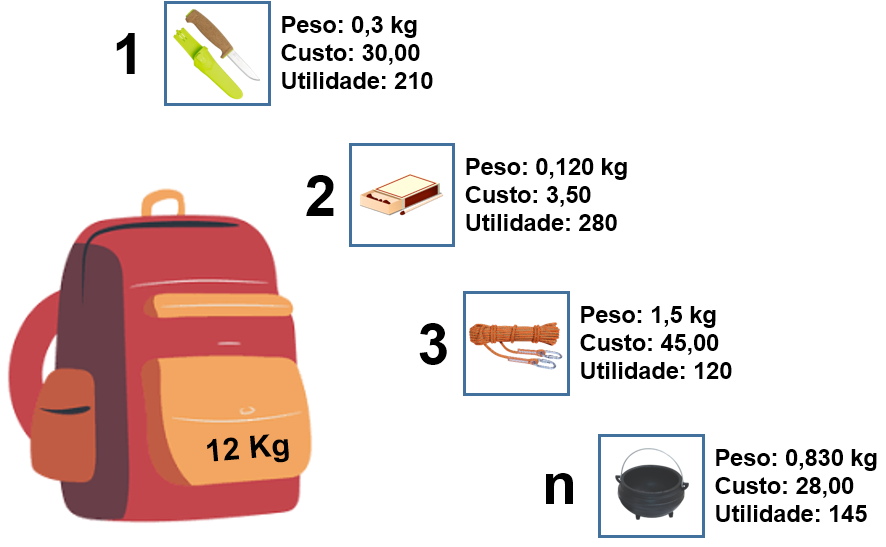

## **SOLUÇÃO PROSTA**

Será utilizado a (técnica) Heurística de ALGORITMOS GENÉTICOS para resolver o problema retornando uma solução satisfatória de acordo com o limite de recursos e tempos disponíveis (ou seja, em um tempo computacional aceitável).

## Pseudo Código
```
  t:=0
  Inicializa_População P(0)
  Enquanto não terminar faça
      Avalie_População(P(t))
      P':= Selecione_Pais(P(t))
      P':= Recombinação_e_mutação(P')
      Avalie_População(P')
      P(t+1):= Selecione_sobreviventes(P(t), P')
      t:=t+1
  Fim enquanto
```



## Etapas Principais do **Algoritmo Genético**

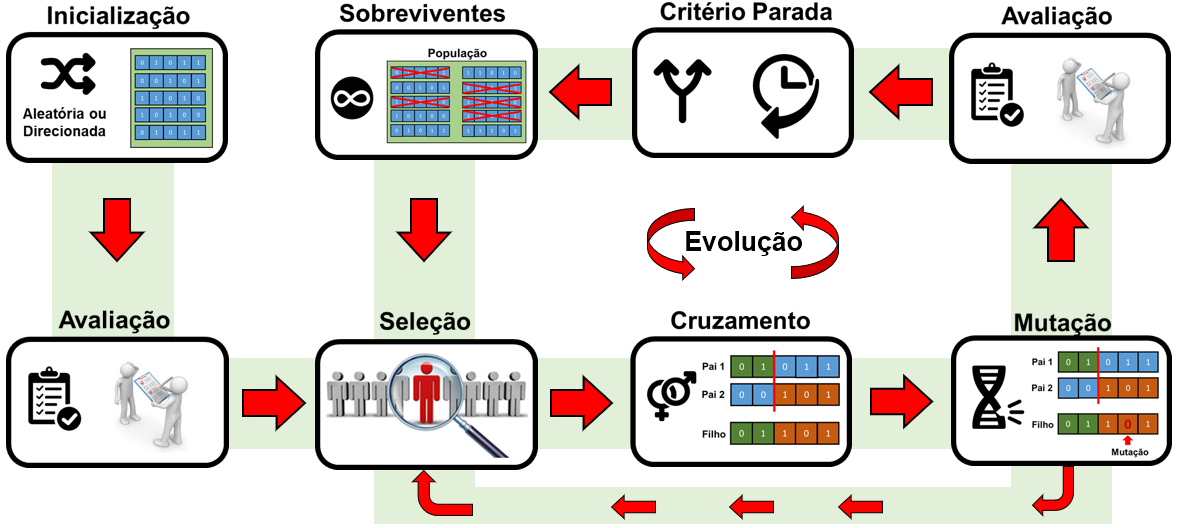

# **[DESENVOLVIMENTO]**

##### Bibliotecas que serão utlizadas.

In [ ]:
# BIBLIOTECAS #
#Inicializa as Lib's necessárias.
import matplotlib.pyplot as plt
import numpy as np

from numpy import linspace
from matplotlib import cm
from IPython.display import clear_output
from time import time

## >> **BASE** <<

Base de dados (disponibilizado: "*Problema da Mochila.csv*") a ser utilizado neste trabalho. Formado por "Item" (id|número do item), "Peso" (peso do item), "Utilidade" (utilidade do item) e "Preço" (preço do item).

### DICIONARIO
Representação em forma de Dicionário (ou, uma pseudo estrutura de dados).

In [ ]:
BASE = {'ITEM': [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25, 
                   26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50, 
                   51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75, 
                   76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 
                  101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 
                  126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 
                  151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 
                  176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 
                  201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 
                  226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 
                  251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 
                  276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 
                  301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 
                  326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 
                  351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 
                  376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 
                  401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 
                  426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 
                  451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 
                  476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
         'PESO': [0.781, 0.834, 1.168, 3.308, 4.014, 4.308, 4.469, 4.170, 1.869, 0.089, 3.855, 4.449, 3.058, 4.318, 2.366, 2.122, 1.013, 3.411, 3.619, 2.203, 
                  4.710, 4.466, 3.758, 0.909, 1.437, 2.267, 0.014, 4.776, 1.027, 2.277, 1.226, 4.638, 1.291, 4.563, 3.177, 3.526, 2.610, 4.274, 2.101, 4.871, 
                  4.649, 2.819, 4.324, 4.547, 1.084, 4.555, 2.833, 2.048, 2.807, 0.580, 0.492, 0.408, 1.089, 3.965, 1.360, 2.458, 2.105, 4.175, 4.727, 4.952, 
                  2.757, 1.290, 2.108, 0.255, 4.768, 1.765, 1.971, 2.727, 4.849, 3.037, 3.195, 4.017, 2.613, 0.107, 1.059, 0.792, 0.890, 0.193, 2.402, 3.412, 
                  2.233, 4.850, 1.052, 4.734, 2.923, 4.970, 2.804, 2.967, 1.549, 4.451, 1.050, 2.776, 2.316, 0.682, 3.110, 1.001, 3.986, 1.065, 0.384, 0.749, 
                  1.346, 3.279, 2.419, 4.971, 0.779, 2.114, 1.233, 3.228, 0.167, 2.399, 1.277, 4.746, 2.216, 3.609, 3.696, 3.894, 2.032, 0.633, 1.203, 3.082, 
                  1.653, 4.981, 3.456, 0.113, 1.483, 4.453, 2.006, 0.938, 0.457, 2.968, 1.204, 1.606, 2.113, 0.505, 2.463, 3.988, 3.746, 3.469, 4.590, 1.070, 
                  3.165, 0.464, 4.127, 0.097, 1.792, 3.333, 1.734, 2.372, 0.354, 2.431, 4.790, 1.857, 0.500, 1.007, 4.013, 2.392, 1.576, 1.609, 2.883, 2.067, 
                  0.671, 2.344, 2.439, 2.680, 2.374, 2.976, 1.777, 1.975, 4.241, 0.010, 0.438, 3.490, 2.743, 4.275, 4.898, 4.509, 3.139, 1.106, 0.103, 0.028, 
                  2.222, 4.567, 4.190, 2.267, 4.321, 4.934, 1.818, 1.558, 2.121, 4.119, 3.676, 0.328, 0.604, 1.031, 1.499, 0.928, 3.172, 0.410, 2.253, 2.083, 
                  2.777, 0.387, 4.809, 0.819, 4.311, 4.957, 1.090, 3.337, 0.092, 4.744, 3.781, 3.675, 1.325, 2.768, 0.673, 3.405, 1.588, 1.042, 1.456, 3.612, 
                  2.747, 3.740, 4.114, 4.275, 0.957, 3.106, 2.587, 3.620, 1.354, 1.070, 0.796, 2.856, 2.181, 2.682, 0.205, 0.926, 0.352, 4.480, 0.612, 1.046, 
                  4.859, 4.620, 0.675, 3.659, 0.560, 3.304, 0.789, 3.158, 1.955, 1.017, 3.768, 4.607, 2.658, 2.234, 3.759, 1.519, 4.909, 1.793, 4.926, 2.803, 
                  2.383, 4.913, 1.940, 1.018, 2.801, 3.507, 3.483, 1.678, 0.071, 2.022, 1.694, 2.198, 0.810, 2.168, 3.237, 2.834, 2.859, 0.896, 1.458, 0.194, 
                  1.114, 1.010, 4.752, 3.641, 0.740, 1.260, 1.839, 4.833, 1.048, 2.875, 1.006, 3.370, 4.143, 4.538, 3.370, 0.738, 2.237, 4.159, 1.934, 0.143, 
                  2.514, 3.194, 0.305, 0.257, 2.504, 3.989, 4.903, 2.468, 2.846, 2.264, 1.703, 0.048, 2.613, 4.891, 2.468, 4.613, 2.772, 0.728, 4.499, 0.672, 
                  3.041, 3.674, 3.833, 4.547, 0.137, 0.245, 4.671, 3.333, 4.622, 3.406, 0.845, 4.371, 1.957, 4.336, 2.233, 4.234, 1.181, 2.389, 2.505, 1.693, 
                  2.751, 3.170, 2.601, 3.333, 0.716, 4.893, 2.334, 1.320, 1.131, 1.671, 3.355, 0.664, 4.926, 0.939, 3.513, 3.056, 1.576, 3.654, 4.992, 3.955, 
                  2.232, 4.301, 2.509, 4.893, 1.471, 0.257, 1.266, 2.312, 3.641, 3.114, 2.238, 3.250, 3.995, 4.463, 4.275, 1.031, 1.667, 1.268, 3.831, 4.319, 
                  2.907, 0.842, 0.759, 1.841, 1.288, 4.638, 4.226, 4.313, 1.665, 3.209, 4.669, 2.522, 3.904, 1.718, 1.007, 4.411, 1.887, 1.150, 2.629, 1.577, 
                  0.576, 3.362, 0.545, 1.102, 1.038, 4.029, 4.783, 2.383, 3.652, 2.272, 4.956, 4.638, 2.320, 4.564, 1.923, 4.752, 2.549, 4.097, 1.779, 0.297, 
                  4.851, 0.855, 1.454, 0.166, 0.180, 1.907, 2.923, 3.219, 4.122, 0.108, 4.798, 0.419, 0.159, 4.522, 3.074, 3.942, 2.303, 3.090, 0.731, 0.068, 
                  2.971, 1.509, 4.476, 1.791, 3.753, 0.252, 3.392, 4.049, 4.554, 1.311, 0.194, 1.304, 1.238, 0.903, 4.217, 3.056, 3.506, 3.021, 2.339, 1.895, 
                  1.725, 0.538, 1.609, 2.801, 0.626, 2.801, 2.276, 2.286, 0.654, 4.721, 3.538, 3.568, 4.983, 1.217, 0.476, 1.696, 4.696, 3.486, 3.098, 4.510, 
                  4.521, 3.464, 2.302, 3.987, 1.971, 3.989, 0.360, 4.756, 4.009, 3.134, 2.223, 4.838, 1.175, 3.278, 4.550, 2.043, 2.727, 1.976, 3.488, 4.503],
    'UTILIDADE': [194, 460, 210, 227, 347, 119, 303,  83, 180, 363, 334, 142, 227, 372, 413, 311, 112, 165, 460, 363, 417, 390, 392, 179, 216, 
                  225, 209,  74, 126, 122, 123, 369, 479, 494,  36, 439,  24, 161, 174, 467,  75, 246, 346, 489,  52, 230,   2,  26,  92, 255, 
                   67, 492, 275, 329, 308, 475,  58, 448, 358, 258, 129, 294,  60, 107, 190, 305, 123, 394,   3, 246, 310, 129, 114, 317, 382, 
                  409, 388, 249,  33, 307, 126, 460, 362, 283, 240,  89, 257, 477,  96, 342, 340, 244, 264, 497, 286, 360,  47, 378, 363, 423, 
                  479,   5,  38, 190, 329, 203,  96, 365, 410, 304, 364, 324, 164, 108, 239, 489, 398, 430, 403, 402,  80, 353, 298, 207, 415, 
                  407, 373, 276, 403, 339, 352,  84, 474, 376, 382, 256,  60, 120, 460,  78,  86, 345, 102,  34,  79, 341, 216, 335, 131, 205, 
                  297,  88, 224, 186, 494, 448,  23, 445, 395, 158, 300, 485, 343, 323, 470,  26, 260,   8, 469, 313, 300, 194, 395,  26, 275, 
                  371, 186,  77, 298, 313, 324, 291, 433, 418, 149, 198,  52, 415, 153, 403, 300, 181, 307, 251,  35,  26, 195, 200, 262, 491, 
                   75, 206,  52, 164, 318, 403, 132,  71, 208, 311, 252, 189,   3, 238, 182, 117, 100,  62, 361, 358, 280, 389, 325, 166, 498, 
                  434,  85, 118, 465, 220, 172, 179,  50, 463, 268,  16, 252, 297,  32, 182, 276,   1, 170, 375, 111, 215, 353, 302, 448,  58, 
                  443, 218, 309, 156, 314, 490, 407, 138, 487, 345,  20, 225, 305, 352, 325, 175, 364, 103, 468,  97,   3, 287, 278, 284, 209, 
                  116,  81, 337, 271, 400,  31,  79, 212, 339, 238, 292,   6, 294, 461, 474,  41, 273, 387, 197, 356, 233, 492, 130, 407, 226, 
                  291, 286, 376,  16, 234, 329, 312, 138,  40, 488, 425, 364,   4, 397, 260, 333,  31, 336, 347,  53, 485, 299, 369, 325, 411, 
                  447,  59,  54, 208, 342, 404, 464, 224, 133, 128, 331, 118, 333, 481, 158, 169, 446, 320, 315, 477, 470, 435, 336,  85, 305, 
                  247, 406, 264, 314, 144, 205, 439, 484, 315, 273, 423, 178, 412, 311, 292, 393, 469,  42,  37, 351,  56,  31, 408,  91, 382, 
                  453,  11, 467, 137, 372, 489, 372, 188, 294, 464, 132,  61, 154, 124,  48, 305,  96, 491, 394, 113, 493, 428, 120, 499, 198, 
                  257,   4, 126, 161, 317, 308, 268,  47, 141,  62, 457, 498, 379, 260, 111, 377, 371, 406, 401, 262,  45, 115, 315, 182, 199, 
                  220, 158, 103, 310,  55,  26,   3,   2, 404, 461, 156, 221, 449, 265, 256, 118,  90, 302,  93, 486,  50,  71, 328, 221, 406, 
                  263, 486, 177, 356, 164, 353, 432, 345, 230,  38,  58, 212, 131,  24, 203, 139, 479, 202, 259,  61, 395,  36, 394,  53,  19, 
                  376, 311, 116, 205, 391, 389, 483, 320, 396, 230,   5, 394, 116, 123, 420, 437, 280, 232, 470,  58, 293, 235, 269, 211, 170],
        'PRECO': [ 69.27,  42.22, 135.84, 128.03, 161.94, 148.51,  24.11, 157.97, 118.07, 180.35, 111.83,  62.77, 125.07,  41.20,  46.10,  43.13, 142.81, 191.75,   1.08,  58.80, 
                   13.84,  32.60,  97.08,  37.18, 168.01, 183.51,  38.18,  48.31, 127.78,   6.89,  38.37,  65.15, 177.97, 190.28, 180.80,  54.96, 157.19, 117.19, 100.11, 150.54, 
                  170.29, 106.29,   1.81, 138.87,   0.75, 196.71,  36.07, 179.88, 135.34, 143.89,   6.37,  50.48, 118.59, 170.85, 119.49, 177.56,  64.57,  61.16,  66.57,  24.68, 
                  104.03,  85.72, 144.84,  94.17,  13.97,   2.09, 193.19,  34.53,   1.35,  27.04, 158.51,  40.39, 192.04, 113.65, 148.12, 106.28, 173.76,  46.72, 154.30, 139.02, 
                   58.20, 123.27,  86.62, 103.40,   2.89, 166.75,  20.48,  42.26,   9.51,   8.67,  66.38, 108.64,  97.48, 116.25,  67.01,   7.01, 123.84,  41.80,  83.02, 147.46, 
                  117.69, 163.08,  62.90, 162.14, 114.26, 192.15,  19.21, 152.58, 153.43, 112.33,  64.42,  23.48, 189.67, 108.69,  18.34,   4.72,   2.78, 199.36, 169.25, 183.12, 
                  103.83, 114.22,  21.92,  97.83, 179.15,  44.51,  20.91,  59.66, 158.34, 133.23,  67.07, 181.91,  69.45,  79.67,  61.86,  96.57, 199.92,  28.84, 133.56,  14.51, 
                   14.31,  66.74,  70.95,  87.76,  14.76,  42.06, 173.15,  85.98,  97.26,  43.27,  49.84,  89.45,  19.83,  93.64, 186.95,  79.37, 156.33,  77.07,  80.48, 135.72, 
                   69.12,  17.91,  71.42, 154.37, 184.32, 100.79,  29.61, 193.57,  69.40, 197.26,  50.85, 168.08, 113.58,  19.03, 105.39, 107.33, 163.70,  60.65,  83.44, 157.65, 
                   14.30,  51.84, 192.97,  23.36, 104.56, 106.47,   0.73,  96.37,  55.21,  29.23,  27.17, 153.15, 174.95, 159.37,  46.01,  57.77, 101.33,  49.00, 160.70, 115.37, 
                   82.86,   2.46,  84.55, 117.13,  39.36, 176.86,   0.75, 198.50, 118.65, 116.57, 162.80,  51.71, 145.99, 174.32,  82.92,  25.09, 185.05,  87.41, 153.29,  13.31, 
                   16.64,  11.46,  70.17,  58.56, 135.21,  69.55,  27.40,   7.13,  55.02, 148.88, 123.42,  25.99, 138.36,  15.36, 138.07,  82.98, 190.42, 186.92,  40.93, 125.27, 
                   39.23,  95.61,  59.26,   2.74, 197.22, 159.12, 134.11,  81.18,  87.42,  34.69, 139.41, 120.90,   1.48, 138.13,  14.36,  47.70, 134.81,  26.89,  44.27, 118.71, 
                   17.71, 175.04,  39.28,  55.52, 126.98, 171.47, 106.99,  83.10,  83.52,  61.28, 109.67, 153.93, 116.99, 162.68, 130.51,  69.57,  29.92, 159.74,  85.90, 129.67, 
                   44.25,  59.19,  49.87,  32.67, 145.38, 116.65,  61.06,  36.06,  49.61, 182.74,  40.34, 173.43, 194.66, 187.16,  19.55, 183.84,  86.16,  73.75, 194.19, 116.69, 
                   21.96, 169.61, 106.72,  18.70, 153.09, 115.44,   3.08, 190.75, 102.32, 148.05, 154.71,  67.47,  15.69,  49.74,  96.34,  97.01,  90.54,  76.49,  65.27, 178.07, 
                  147.75, 176.56,  13.76,  75.25,  37.67,  46.17, 138.66,  43.89, 150.24, 126.96,  97.41,   1.27, 134.89,  35.19, 153.21, 177.28,  28.14,  83.26, 130.87, 155.84, 
                   89.77,  88.78, 145.61,  40.97,  95.24,  11.55,  14.47,  16.19, 132.97,  87.02,  73.14,  97.44,  33.47, 124.40,  73.68,  57.04, 120.21, 118.98, 114.24,  89.23, 
                  151.12,  95.94, 182.26,  10.41, 156.20, 191.99, 154.17,  54.30, 103.77, 159.86,  94.21, 108.47,  52.03,  66.75,  94.51,  16.00,  93.55, 126.97,  26.31,  87.03, 
                   49.40,  54.23, 194.03,  83.00,   7.62, 122.85, 113.71,  27.07,  70.52, 158.98,  62.12,  18.18, 126.24,  17.28,   5.85, 167.57, 108.94,  19.24, 100.24,   0.51, 
                  199.50, 192.53,  58.79, 183.33, 174.10,   6.45, 134.28, 109.11, 100.44, 182.79,   1.77, 136.16, 177.07,  30.63, 116.83,  57.58,  83.93,  98.29,  35.26,  34.37, 
                    1.01,  71.48, 141.48, 104.09,  14.22, 143.28, 191.50, 180.87,  29.38,  49.72, 199.44, 136.56, 110.04, 117.74, 179.45, 136.40, 128.48, 100.49, 173.93, 160.16, 
                   31.99, 132.38, 141.84, 104.19, 21.40,  171.64,  91.41, 163.78, 105.35,  41.36,  24.70,  59.30, 140.90,  69.99, 129.65,  32.88, 135.28, 104.91, 109.50, 106.69,
                  169.89,   6.68,  28.16, 128.92, 147.26,  12.86, 106.71,  89.54, 140.79,  10.93,  78.58, 190.36,  60.36, 117.70,  83.69, 129.80,  44.49, 128.49,  91.99, 146.55, 
                   83.36, 108.34,  76.22,  19.46,  66.61,   1.96,  85.64, 179.31, 119.03, 168.85, 121.66, 145.89,  87.04,  62.66, 116.23,  97.76, 128.01, 109.57,  85.88,  68.34]
}

### MATRIZ

Representação auxiliar da base.

In [ ]:
# BASE_ : [PESO, UTILIDADE, PRECO]
BASE_ =  [[0.781, 194, 69.27],
          [0.834, 460, 42.22],
          [1.168, 210, 135.84],
          [3.308, 227, 128.03],
          [4.014, 347, 161.94],
          [4.308, 119, 148.51],
          [4.469, 303, 24.11],
          [4.17, 83, 157.97],
          [1.869, 180, 118.07],
          [0.089, 363, 180.35],
          [3.855, 334, 111.83],
          [4.449, 142, 62.77],
          [3.058, 227, 125.07],
          [4.318, 372, 41.2],
          [2.366, 413, 46.1],
          [2.122, 311, 43.13],
          [1.013, 112, 142.81],
          [3.411, 165, 191.75],
          [3.619, 460, 1.08],
          [2.203, 363, 58.8],
          [4.71, 417, 13.84],
          [4.466, 390, 32.6],
          [3.758, 392, 97.08],
          [0.909, 179, 37.18],
          [1.437, 216, 168.01],
          [2.267, 225, 183.51],
          [0.014, 209, 38.18],
          [4.776, 74, 48.31],
          [1.027, 126, 127.78],
          [2.277, 122, 6.89],
          [1.226, 123, 38.37],
          [4.638, 369, 65.15],
          [1.291, 479, 177.97],
          [4.563, 494, 190.28],
          [3.177, 36, 180.8],
          [3.526, 439, 54.96],
          [2.61, 24, 157.19],
          [4.274, 161, 117.19],
          [2.101, 174, 100.11],
          [4.871, 467, 150.54],
          [4.649, 75, 170.29],
          [2.819, 246, 106.29],
          [4.324, 346, 1.81],
          [4.547, 489, 138.87],
          [1.084, 52, 0.75],
          [4.555, 230, 196.71],
          [2.833, 2, 36.07],
          [2.048, 26, 179.88],
          [2.807, 92, 135.34],
          [0.58, 255, 143.89],
          [0.492, 67, 6.37],
          [0.408, 492, 50.48],
          [1.089, 275, 118.59],
          [3.965, 329, 170.85],
          [1.36, 308, 119.49],
          [2.458, 475, 177.56],
          [2.105, 58, 64.57],
          [4.175, 448, 61.16],
          [4.727, 358, 66.57],
          [4.952, 258, 24.68],
          [2.757, 129, 104.03],
          [1.29, 294, 85.72],
          [2.108, 60, 144.84],
          [0.255, 107, 94.17],
          [4.768, 190, 13.97],
          [1.765, 305, 2.09],
          [1.971, 123, 193.19],
          [2.727, 394, 34.53],
          [4.849, 3, 1.35],
          [3.037, 246, 27.04],
          [3.195, 310, 158.51],
          [4.017, 129, 40.39],
          [2.613, 114, 192.04],
          [0.107, 317, 113.65],
          [1.059, 382, 148.12],
          [0.792, 409, 106.28],
          [0.89, 388, 173.76],
          [0.193, 249, 46.72],
          [2.402, 33, 154.3],
          [3.412, 307, 139.02],
          [2.233, 126, 58.2],
          [4.85, 460, 123.27],
          [1.052, 362, 86.62],
          [4.734, 283, 103.4],
          [2.923, 240, 2.89],
          [4.97, 89, 166.75],
          [2.804, 257, 20.48],
          [2.967, 477, 42.26],
          [1.549, 96, 9.51],
          [4.451, 342, 8.67],
          [1.05, 340, 66.38],
          [2.776, 244, 108.64],
          [2.316, 264, 97.48],
          [0.682, 497, 116.25],
          [3.11, 286, 67.01],
          [1.001, 360, 7.01],
          [3.986, 47, 123.84],
          [1.065, 378, 41.8],
          [0.384, 363, 83.02],
          [0.749, 423, 147.46],
          [1.346, 479, 117.69],
          [3.279, 5, 163.08],
          [2.419, 38, 62.9],
          [4.971, 190, 162.14],
          [0.779, 329, 114.26],
          [2.114, 203, 192.15],
          [1.233, 96, 19.21],
          [3.228, 365, 152.58],
          [0.167, 410, 153.43],
          [2.399, 304, 112.33],
          [1.277, 364, 64.42],
          [4.746, 324, 23.48],
          [2.216, 164, 189.67],
          [3.609, 108, 108.69],
          [3.696, 239, 18.34],
          [3.894, 489, 4.72],
          [2.032, 398, 2.78],
          [0.633, 430, 199.36],
          [1.203, 403, 169.25],
          [3.082, 402, 183.12],
          [1.653, 80, 103.83],
          [4.981, 353, 114.22],
          [3.456, 298, 21.92],
          [0.113, 207, 97.83],
          [1.483, 415, 179.15],
          [4.453, 407, 44.51],
          [2.006, 373, 20.91],
          [0.938, 276, 59.66],
          [0.457, 403, 158.34],
          [2.968, 339, 133.23],
          [1.204, 352, 67.07],
          [1.606, 84, 181.91],
          [2.113, 474, 69.45],
          [0.505, 376, 79.67],
          [2.463, 382, 61.86],
          [3.988, 256, 96.57],
          [3.746, 60, 199.92],
          [3.469, 120, 28.84],
          [4.59, 460, 133.56],
          [1.07, 78, 14.51],
          [3.165, 86, 14.31],
          [0.464, 345, 66.74],
          [4.127, 102, 70.95],
          [0.097, 34, 87.76],
          [1.792, 79, 14.76],
          [3.333, 341, 42.06],
          [1.734, 216, 173.15],
          [2.372, 335, 85.98],
          [0.354, 131, 97.26],
          [2.431, 205, 43.27],
          [4.79, 297, 49.84],
          [1.857, 88, 89.45],
          [0.5, 224, 19.83],
          [1.007, 186, 93.64],
          [4.013, 494, 186.95],
          [2.392, 448, 79.37],
          [1.576, 23, 156.33],
          [1.609, 445, 77.07],
          [2.883, 395, 80.48],
          [2.067, 158, 135.72],
          [0.671, 300, 69.12],
          [2.344, 485, 17.91],
          [2.439, 343, 71.42],
          [2.68, 323, 154.37],
          [2.374, 470, 184.32],
          [2.976, 26, 100.79],
          [1.777, 260, 29.61],
          [1.975, 8, 193.57],
          [4.241, 469, 69.4],
          [0.01, 313, 197.26],
          [0.438, 300, 50.85],
          [3.49, 194, 168.08],
          [2.743, 395, 113.58],
          [4.275, 26, 19.03],
          [4.898, 275, 105.39],
          [4.509, 371, 107.33],
          [3.139, 186, 163.7],
          [1.106, 77, 60.65],
          [0.103, 298, 83.44],
          [0.028, 313, 157.65],
          [2.222, 324, 14.3],
          [4.567, 291, 51.84],
          [4.19, 433, 192.97],
          [2.267, 418, 23.36],
          [4.321, 149, 104.56],
          [4.934, 198, 106.47],
          [1.818, 52, 0.73],
          [1.558, 415, 96.37],
          [2.121, 153, 55.21],
          [4.119, 403, 29.23],
          [3.676, 300, 27.17],
          [0.328, 181, 153.15],
          [0.604, 307, 174.95],
          [1.031, 251, 159.37],
          [1.499, 35, 46.01],
          [0.928, 26, 57.77],
          [3.172, 195, 101.33],
          [0.41, 200, 49],
          [2.253, 262, 160.7],
          [2.083, 491, 115.37],
          [2.777, 75, 82.86],
          [0.387, 206, 2.46],
          [4.809, 52, 84.55],
          [0.819, 164, 117.13],
          [4.311, 318, 39.36],
          [4.957, 403, 176.86],
          [1.09, 132, 0.75],
          [3.337, 71, 198.5],
          [0.092, 208, 118.65],
          [4.744, 311, 116.57],
          [3.781, 252, 162.8],
          [3.675, 189, 51.71],
          [1.325, 3, 145.99],
          [2.768, 238, 174.32],
          [0.673, 182, 82.92],
          [3.405, 117, 25.09],
          [1.588, 100, 185.05],
          [1.042, 62, 87.41],
          [1.456, 361, 153.29],
          [3.612, 358, 13.31],
          [2.747, 280, 16.64],
          [3.74, 389, 11.46],
          [4.114, 325, 70.17],
          [4.275, 166, 58.56],
          [0.957, 498, 135.21],
          [3.106, 434, 69.55],
          [2.587, 85, 27.4],
          [3.62, 118, 7.13],
          [1.354, 465, 55.02],
          [1.07, 220, 148.88],
          [0.796, 172, 123.42],
          [2.856, 179, 25.99],
          [2.181, 50, 138.36],
          [2.682, 463, 15.36],
          [0.205, 268, 138.07],
          [0.926, 16, 82.98],
          [0.352, 252, 190.42],
          [4.48, 297, 186.92],
          [0.612, 32, 40.93],
          [1.046, 182, 125.27],
          [4.859, 276, 39.23],
          [4.62, 1, 95.61],
          [0.675, 170, 59.26],
          [3.659, 375, 2.74],
          [0.56, 111, 197.22],
          [3.304, 215, 159.12],
          [0.789, 353, 134.11],
          [3.158, 302, 81.18],
          [1.955, 448, 87.42],
          [1.017, 58, 34.69],
          [3.768, 443, 139.41],
          [4.607, 218, 120.9],
          [2.658, 309, 1.48],
          [2.234, 156, 138.13],
          [3.759, 314, 14.36],
          [1.519, 490, 47.7],
          [4.909, 407, 134.81],
          [1.793, 138, 26.89],
          [4.926, 487, 44.27],
          [2.803, 345, 118.71],
          [2.383, 20, 17.71],
          [4.913, 225, 175.04],
          [1.94, 305, 39.28],
          [1.018, 352, 55.52],
          [2.801, 325, 126.98],
          [3.507, 175, 171.47],
          [3.483, 364, 106.99],
          [1.678, 103, 83.1],
          [0.071, 468, 83.52],
          [2.022, 97, 61.28],
          [1.694, 3, 109.67],
          [2.198, 287, 153.93],
          [0.81, 278, 116.99],
          [2.168, 284, 162.68],
          [3.237, 209, 130.51],
          [2.834, 116, 69.57],
          [2.859, 81, 29.92],
          [0.896, 337, 159.74],
          [1.458, 271, 85.9],
          [0.194, 400, 129.67],
          [1.114, 31, 44.25],
          [1.01, 79, 59.19],
          [4.752, 212, 49.87],
          [3.641, 339, 32.67],
          [0.74, 238, 145.38],
          [1.26, 292, 116.65],
          [1.839, 6, 61.06],
          [4.833, 294, 36.06],
          [1.048, 461, 49.61],
          [2.875, 474, 182.74],
          [1.006, 41, 40.34],
          [3.37, 273, 173.43],
          [4.143, 387, 194.66],
          [4.538, 197, 187.16],
          [3.37, 356, 19.55],
          [0.738, 233, 183.84],
          [2.237, 492, 86.16],
          [4.159, 130, 73.75],
          [1.934, 407, 194.19],
          [0.143, 226, 116.69],
          [2.514, 291, 21.96],
          [3.194, 286, 169.61],
          [0.305, 376, 106.72],
          [0.257, 16, 18.7],
          [2.504, 234, 153.09],
          [3.989, 329, 115.44],
          [4.903, 312, 3.08],
          [2.468, 138, 190.75],
          [2.846, 40, 102.32],
          [2.264, 488, 148.05],
          [1.703, 425, 154.71],
          [0.048, 364, 67.47],
          [2.613, 4, 15.69],
          [4.891, 397, 49.74],
          [2.468, 260, 96.34],
          [4.613, 333, 97.01],
          [2.772, 31, 90.54],
          [0.728, 336, 76.49],
          [4.499, 347, 65.27],
          [0.672, 53, 178.07],
          [3.041, 485, 147.75],
          [3.674, 299, 176.56],
          [3.833, 369, 13.76],
          [4.547, 325, 75.25],
          [0.137, 411, 37.67],
          [0.245, 447, 46.17],
          [4.671, 59, 138.66],
          [3.333, 54, 43.89],
          [4.622, 208, 150.24],
          [3.406, 342, 126.96],
          [0.845, 404, 97.41],
          [4.371, 464, 1.27],
          [1.957, 224, 134.89],
          [4.336, 133, 35.19],
          [2.233, 128, 153.21],
          [4.234, 331, 177.28],
          [1.181, 118, 28.14],
          [2.389, 333, 83.26],
          [2.505, 481, 130.87],
          [1.693, 158, 155.84],
          [2.751, 169, 89.77],
          [3.17, 446, 88.78],
          [2.601, 320, 145.61],
          [3.333, 315, 40.97],
          [0.716, 477, 95.24],
          [4.893, 470, 11.55],
          [2.334, 435, 14.47],
          [1.32, 336, 16.19],
          [1.131, 85, 132.97],
          [1.671, 305, 87.02],
          [3.355, 247, 73.14],
          [0.664, 406, 97.44],
          [4.926, 264, 33.47],
          [0.939, 314, 124.4],
          [3.513, 144, 73.68],
          [3.056, 205, 57.04],
          [1.576, 439, 120.21],
          [3.654, 484, 118.98],
          [4.992, 315, 114.24],
          [3.955, 273, 89.23],
          [2.232, 423, 151.12],
          [4.301, 178, 95.94],
          [2.509, 412, 182.26],
          [4.893, 311, 10.41],
          [1.471, 292, 156.2],
          [0.257, 393, 191.99],
          [1.266, 469, 154.17],
          [2.312, 42, 54.3],
          [3.641, 37, 103.77],
          [3.114, 351, 159.86],
          [2.238, 56, 94.21],
          [3.25, 31, 108.47],
          [3.995, 408, 52.03],
          [4.463, 91, 66.75],
          [4.275, 382, 94.51],
          [1.031, 453, 16],
          [1.667, 11, 93.55],
          [1.268, 467, 126.97],
          [3.831, 137, 26.31],
          [4.319, 372, 87.03],
          [2.907, 489, 49.4],
          [0.842, 372, 54.23],
          [0.759, 188, 194.03],
          [1.841, 294, 83],
          [1.288, 464, 7.62],
          [4.638, 132, 122.85],
          [4.226, 61, 113.71],
          [4.313, 154, 27.07],
          [1.665, 124, 70.52],
          [3.209, 48, 158.98],
          [4.669, 305, 62.12],
          [2.522, 96, 18.18],
          [3.904, 491, 126.24],
          [1.718, 394, 17.28],
          [1.007, 113, 5.85],
          [4.411, 493, 167.57],
          [1.887, 428, 108.94],
          [1.15, 120, 19.24],
          [2.629, 499, 100.24],
          [1.577, 198, 0.51],
          [0.576, 257, 199.5],
          [3.362, 4, 192.53],
          [0.545, 126, 58.79],
          [1.102, 161, 183.33],
          [1.038, 317, 174.1],
          [4.029, 308, 6.45],
          [4.783, 268, 134.28],
          [2.383, 47, 109.11],
          [3.652, 141, 100.44],
          [2.272, 62, 182.79],
          [4.956, 457, 1.77],
          [4.638, 498, 136.16],
          [2.32, 379, 177.07],
          [4.564, 260, 30.63],
          [1.923, 111, 116.83],
          [4.752, 377, 57.58],
          [2.549, 371, 83.93],
          [4.097, 406, 98.29],
          [1.779, 401, 35.26],
          [0.297, 262, 34.37],
          [4.851, 45, 1.01],
          [0.855, 115, 71.48],
          [1.454, 315, 141.48],
          [0.166, 182, 104.09],
          [0.18, 199, 14.22],
          [1.907, 220, 143.28],
          [2.923, 158, 191.5],
          [3.219, 103, 180.87],
          [4.122, 310, 29.38],
          [0.108, 55, 49.72],
          [4.798, 26, 199.44],
          [0.419, 3, 136.56],
          [0.159, 2, 110.04],
          [4.522, 404, 117.74],
          [3.074, 461, 179.45],
          [3.942, 156, 136.4],
          [2.303, 221, 128.48],
          [3.09, 449, 100.49],
          [0.731, 265, 173.93],
          [0.068, 256, 160.16],
          [2.971, 118, 31.99],
          [1.509, 90, 132.38],
          [4.476, 302, 141.84],
          [1.791, 93, 104.19],
          [3.753, 486, 21.4],
          [0.252, 50, 171.64],
          [3.392, 71, 91.41],
          [4.049, 328, 163.78],
          [4.554, 221, 105.35],
          [1.311, 406, 41.36],
          [0.194, 263, 24.7],
          [1.304, 486, 59.3],
          [1.238, 177, 140.9],
          [0.903, 356, 69.99],
          [4.217, 164, 129.65],
          [3.056, 353, 32.88],
          [3.506, 432, 135.28],
          [3.021, 345, 104.91],
          [2.339, 230, 109.5],
          [1.895, 38, 106.69],
          [1.725, 58, 169.89],
          [0.538, 212, 6.68],
          [1.609, 131, 28.16],
          [2.801, 24, 128.92],
          [0.626, 203, 147.26],
          [2.801, 139, 12.86],
          [2.276, 479, 106.71],
          [2.286, 202, 89.54],
          [0.654, 259, 140.79],
          [4.721, 61, 10.93],
          [3.538, 395, 78.58],
          [3.568, 36, 190.36],
          [4.983, 394, 60.36],
          [1.217, 53, 117.7],
          [0.476, 19, 83.69],
          [1.696, 376, 129.8],
          [4.696, 311, 44.49],
          [3.486, 116, 128.49],
          [3.098, 205, 91.99],
          [4.51, 391, 146.55],
          [4.521, 389, 83.36],
          [3.464, 483, 108.34],
          [2.302, 320, 76.22],
          [3.987, 396, 19.46],
          [1.971, 230, 66.61],
          [3.989, 5, 1.96],
          [0.36, 394, 85.64],
          [4.756, 116, 179.31],
          [4.009, 123, 119.03],
          [3.134, 420, 168.85],
          [2.223, 437, 121.66],
          [4.838, 280, 145.89],
          [1.175, 232, 87.04],
          [3.278, 470, 62.66],
          [4.55, 58, 116.23],
          [2.043, 293, 97.76],
          [2.727, 235, 128.01],
          [1.976, 269, 109.57],
          [3.488, 211, 85.88],
          [4.503, 170, 68.34]]

### Visualização da BASE

Cada item da Base está representado no gráfico de acordo com sua Utilidade, Preço e Peso (X, Y, Z respectivamente). Quanto mais "escuro/denso" estiver sua representação, maior será seu valor/sua contribuição no cálculo da ***FunçãoObjetivo*** (Fetness).

               RANGE BASE
       Peso: 0 .. 4.992
  Utilidade: 0 .. 499
      Preco: 0 .. 199.92



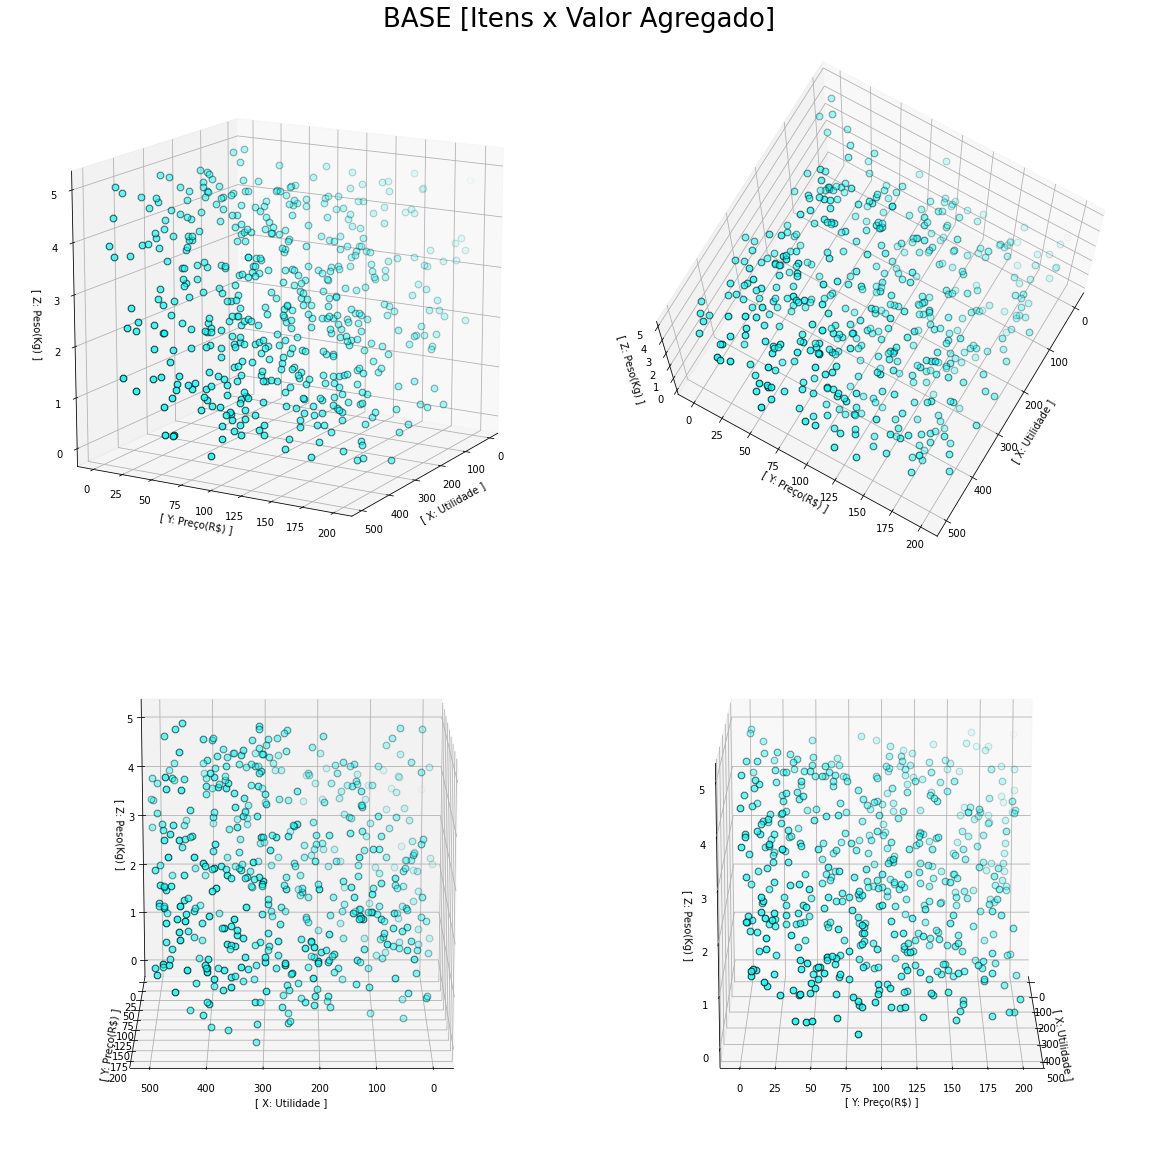

In [ ]:
# =========================================================================================
# Código para gerar/plotar os gráficos para a Visualização da BASE nas dimensões informadas
# =========================================================================================
# Outras informações:
# PESO total da BASE = 1270.87
# UTILIDADE total da BASE = 128486
# PRECAO total da BASE = 47746.55
# ------------------------------------------------------------------------------------------
maxPESO = max(BASE['PESO'])       # Peso máximo encontrado na BASE 
maxUTIL = max(BASE['UTILIDADE'])  # Valor máximo de Utilidade de um item encontrado na BASE 
maxPREC = max(BASE['PRECO'])      # Preço máximo encontrado na BASE

print('='*40)
print(' '*14,'RANGE BASE')
print('='*40)
print('       Peso: 0 ..',maxPESO)
print('  Utilidade: 0 ..',maxUTIL)
print('      Preco: 0 ..',maxPREC)
print('='*40)
print()

fig, axs = plt.subplots(2, 2, figsize=(16,16), constrained_layout=True, subplot_kw={'projection': '3d'})
fig.suptitle('BASE [Itens x Valor Agregado]', size=26) #Titulo do gráfico

def plotaBASE(ax, lev, zim):
    for i in range(len(BASE['ITEM'])):
          # Calcula a "densidade" do item (1 para mais denso, 0 para menos denso)
          # Quanto mais "denso", maior é seu valor/sua contribuição no cálculo da FunçãoObjetivo
          aux1 = BASE['UTILIDADE'][i]/round(maxUTIL)
          aux2 = 1-(BASE['PRECO'][i]/round(maxPREC))
          aux3 = 1-(BASE['PESO'][i]/round(maxPESO))
          defALPHA = (aux1+aux2+aux3)/3

          graph = ax.scatter(
                            (BASE['UTILIDADE'][i]),#X
                            (BASE['PRECO'][i]),    #Y
                            (BASE['PESO'][i]),     #Z
                            c='cyan', marker="8", 
                            s=50, alpha=defALPHA, linewidth=1, edgecolors='k'
                            )          
    ax.set_xlabel('[ X: Utilidade ]')
    ax.set_ylabel('[ Y: Preço(R$) ]')
    ax.set_zlabel('[ Z: Peso(Kg) ]')       
    ax.view_init(lev, zim)

#========== Grafico [0,0] ==========
plotaBASE(axs[0,0],15,30)
#========== Grafico [0,1] ==========
plotaBASE(axs[0,1],75,30)
#========== Grafico [1,0] ==========
plotaBASE(axs[1,0],15,90)
#========== Grafico [1,1] ==========
plotaBASE(axs[1,1],15,0)
#===================================

fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, 
                                hspace=0.05, wspace=0.05)
plt.show()
# ========================================================================================

## >> **CODIGO** <<

"*Deve ser implementado no algoritmo pelo menos: 2 métodos de Seleção; 2 métodos de Cruzamento e 2 Técnicas de População.*

*Essas implementações não devem ser executadas no mesmo processo de evolução. Os testes deverão ser feitos na seguinte ordem:*

1. *Executar o algoritmo 5 vezes para os dois operadores de seleção, qual obtiver o melhor resultado, irá ser usado na próxima fase;*
2. *Executar o algoritmo 5 vezes para os dois operadores de Cruzamento, usando o melhor operador de seleção da etapa anterior para todos os testes, qual obtiver o melhor resultado irá ser usado na próxima fase;*
3. *Executar o algoritmo 5 vezes para duas técnicas de população, usando o melhor operador de Cruzamento da etapa anterior para todos os testes;* "

##### Variáveis que serão utlizadas:

In [ ]:
# ==========================================================================================
# --------- #
# VARIAVEIS #
# --------- #
qtdITENS = 500 #Quantidades de itens disponíveis que podem ser colocados na Mochila.
maxPESO  = 12  #Peso Máximo suportado pela Mochila.

tamanhoPOPULACAO = 1000 #40*qtdITENS - Conforme definido em aula "um lugar para começar seria 40 * Numero de características em seu cromossomo".
tamanhoCROMOSSOMO = qtdITENS
listITENS = BASE_[0:qtdITENS]
arrayITENS = np.array(listITENS)

# -------------- #
# FUNCOES COMUNS #
# -------------- #
tamMargem = 100
def printCABECALHO(text,sep):
    lenSpace = int((tamMargem - len(text))/2)
    print(sep*tamMargem)
    print(' '*lenSpace,text)
    print(sep*tamMargem)
    print('')

def printCROMOSSOMO(cromo):
    # print('CROMOSSOMO:')
    # print(cromo)
    # print()
    itensMOCHILA=[]
    totalPeso, totalUtilidade, totalPreco = 0,0,0
    for i in range(len(cromo)):
        if (cromo[i] > 0):
            itensMOCHILA.append(i+1)
            # print('Itens ',i+1)
            totalPeso += BASE['PESO'][i]
            # print('Peso',BASE['PESO'][i])
            totalUtilidade += BASE['UTILIDADE'][i]
            # print('Utilidade',BASE['UTILIDADE'][i])
            totalPreco = BASE['PRECO'][i]
            # print('Preço',BASE['PRECO'][i])

    print('Itens Escolhido:',itensMOCHILA)
    print('Fitness:', fitness(cromo))
    print('Peso: %0.2f Kg' %totalPeso,'- Utilidade:',totalUtilidade,'- Preço: $',totalPreco)

def readCROMOSSOMO(cromo):
    itensMOCHILA=[]
    totalPeso, totalUtilidade, totalPreco = 0,0,0
    for i in range(len(cromo)):
        if (cromo[i] > 0):
            itensMOCHILA.append(i+1)
            totalPeso += BASE['PESO'][i]
            totalUtilidade += BASE['UTILIDADE'][i]
            totalPreco = BASE['PRECO'][i]

    return itensMOCHILA, totalPeso, totalUtilidade, totalPreco

def readPESOCROMO(cromo):
    totalPeso = 0
    for i in range(len(cromo)):
        if (cromo[i] > 0):
            totalPeso += BASE['PESO'][i]

    return round(totalPeso,3)


# -------------- #
# FUNCOES GRAFIC #
# -------------- #
#------------------------------------------------------------------------------#
def func(utilidade, preco):
	tmp = utilidade/preco
	return tmp
#------------------------------------------------------------------------------#
# eixoX: Utilidade | eixoY: Preco
X, Y = np.linspace(1, 500, 500), np.linspace(0, 200, 500)
X, Y = np.meshgrid(X, Y)
Z = func(X, Y) #eixoZ: Fitness
#------------------------------------------------------------------------------#
#------------------------------------------------------------------------------#
def plotPOPFIT(cromoBEST, title, tX, tY):
    fig = plt.figure(figsize=(tX, tY))
    ax = fig.gca(projection='3d')

    ax.plot_wireframe(X, Y, Z, cmap=cm.seismic, antialiased=True, alpha=0.2, linewidth=1, color='black')
    ax.contour3D(X, Y, Z, 150, cmap=cm.binary, alpha=0.4, linewidth=1, antialiased=True)

    for rod in range(len(BASE['ITEM'])):
            if (soma[rod]==0): 
                color='gray'
                mk="o"
                alp=1.0
                Sx=30
            elif (cromoBEST[rod]==0): 
                color='orange'
                mk="o"
                alp=0.5
                Sx=30
            else:
                color='green'
                mk="8"
                alp=1.0
                Sx=60
            graph = ax.scatter(
                              (BASE['UTILIDADE'][rod]),#X
                              (BASE['PRECO'][rod]),    #Y
                              (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
                              c=color, marker=mk, 
                              s=Sx, alpha=alp, linewidth=0.5, edgecolors='k'
                              )
            
    ax.set_title(title) #Titulo do gráfico
    ax.set_xlabel('[X: Utilidade]')
    ax.set_ylabel('[Y: Preço(R$)]')
    ax.set_zlabel('Função Objetivo(x) | Fitness')       
    ax.view_init(15, 30)
    # clear_output()

    # plt.show()
#------------------------------------------------------------------------------#
def plotPOPINI(title, tX, tY):
    fig = plt.figure(figsize=(tX, tY))
    ax = fig.gca(projection='3d')

    for i in range(len(BASE['ITEM'])):
          if (soma[i]==0): color='cyan'
          else: color='green'
          aux1 = BASE['UTILIDADE'][i]/round(maxUTIL)
          aux2 = 1-(BASE['PRECO'][i]/round(maxPREC))
          aux3 = 1-(BASE['PESO'][i]/round(maxPESO))
          defALPHA = (aux1+aux2+aux3)/3

          graph = ax.scatter(
                            (BASE['UTILIDADE'][i]),#X
                            (BASE['PRECO'][i]),    #Y
                            (BASE['PESO'][i]),     #Z
                            c=color, marker="8", 
                            s=50, alpha=defALPHA, linewidth=1, edgecolors='k'
                            )          
    ax.set_title(title) #Titulo do gráfico
    ax.set_xlabel('[ X: Utilidade ]')
    ax.set_ylabel('[ Y: Preço(R$) ]')
    ax.set_zlabel('[ Z: Peso(Kg) ]')
    ax.view_init(15, 30)
# ------------------------------------------------------------------------------------------
# ==========================================================================================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide


### **ALGORITMOS GENÉTICOS - EVOLUÇÃO:**

### **1) INICIALIZAÇÃO**

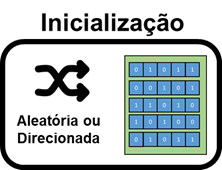

#### 1.1) Código:

In [ ]:
# ==========================================================================================
#                                       INICIALIZAÇÃO
# ==========================================================================================
# Gera a População inicial.
# Recebe como entrada um tamanho Definido da População Inicial e gera cada individuo/cromossomo
# um a um de forma aleatória.

In [ ]:
# ==========================================================================================
# Esta Função (iniciaPopulacao_A) gera/retorna a População Inicial gerando cada CROMOSSOMO da seguinte forma:
# Para cada Cromomosso é escolhido aleatóriamente (0,1) cada Gene (de forma linear - ex.: gene1, gene2, gene3...) 
# até que o Cromosso possua seu "Peso" dentro do limite máximo permitido (maxPeso).
def iniciaPopulacao_A(tamanhoPop, tamanhoCromo):
    pop = np.zeros((tamanhoPop, tamanhoCromo), int)
    for i in range(tamanhoPop):
        peso = 0
        for j in range(tamanhoCromo):         # 'anda'(linearmente) gene por gene (j) e escolhe se o gene será 0 ou 1 de forma aleatória.
            choice = np.random.randint(0, 2)  # random entre (0,1) para definir se escolhe ou não o gente (o item que o gene representa).
            if choice:                        # Se positivo (1), o gene é setado no cromossomo e o "Peso" total do cromosso é calculado.
                if peso+listITENS[j][0] <= maxPESO:
                    pop[i][j] = 1
                    peso = peso+listITENS[j][0]
        # print('Cromo',i,' peso:',peso)
    return pop
# ==========================================================================================

In [ ]:
# ==========================================================================================
# Esta Função (iniciaPopulacao_B) gera/retorna a População Inicial gerando cada CROMOSSOMO da seguinte forma:
# Para cada Cromomosso é escolhido aleatóriamente (0,1) cada Gene (de forma aleatória - ex.: gene10, gene1, gene38...) 
# até que o Cromosso possua seu "Peso" dentro do limite máximo permitido (maxPeso).
def iniciaPopulacao_B(tamanhoPop, tamanhoCromo):
    pop = np.zeros((tamanhoPop, tamanhoCromo), int)
    for i in range(tamanhoPop):
        geraCromo = True
        peso = 0
        while geraCromo:
            pos = np.random.randint(0,tamanhoCromo)
            if pop[i][pos] == 0:              
              if (peso+listITENS[pos][0] > maxPESO): 
                  geraCromo = False
                  break
              pop[i][pos] = 1
              peso = peso + listITENS[pos][0]
        # print('Cromo',i,' peso:',peso)
    return pop
# ==========================================================================================

In [ ]:
# ==========================================================================================
# __MAIN__ Inicialização
# Função para iniciar a População de acordo com uma das Opções de GeraçãoInicialPopulaçao definidos acima.
def iniciaPopulacao(tamanhoPop, tamanhoCromo, op):
    if   op == 1: pop = iniciaPopulacao_A(tamanhoPop, tamanhoCromo)
    elif op == 2: pop = iniciaPopulacao_B(tamanhoPop, tamanhoCromo)
    return pop
# ==========================================================================================

#### 1.2) Testes:

In [ ]:
# ------------------------------------------------------------------------------------------
#TESTE - Gera a População Inicial passando como parâmetro a Opção 1 (iniciaPopulacao_A)
populacao_OP1 = iniciaPopulacao(tamanhoPOPULACAO, tamanhoCROMOSSOMO, 1)

#Printa o Resultado
printCABECALHO('TESTE INICIALIZAÇÃO: iniciaPopulacao - Opção 01','=')
x = 10  #Variável para definir somente uma parte da População Inicial para ser "printada"/mostrada.
print('populacao_OP1: População Inicial de tamanho', len(populacao_OP1),'(Cromossomos).','\n')
print('Segue os',x,'primeiros da População Inicial (via Opção 1):')
print(populacao_OP1[:x],'\n')
print('')

print('Distribuição da População Op1: como/quantas vezes cada item(gene) foi escolhido.')
soma=[]
soma= populacao_OP1[0].copy()
for i in range(1, len(populacao_OP1)):
    soma += populacao_OP1[i]
print(soma, '\n')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                           TESTE INICIALIZAÇÃO: iniciaPopulacao - Opção 01

populacao_OP1: População Inicial de tamanho 1000 (Cromossomos). 

Segue os 10 primeiros da População Inicial (via Opção 1):
[[1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]] 


Distribuição da População Op1: como/quantas vezes cada item(gene) foi escolhido.
[508 503 481 510 485 403 263 163 369 484 103  48 105  20 137  84 245   4
   5  21   0   0   0 173  45   3 506   0  62   0  25   0   9   0   0   0
   0   0   0   0   0   0   0   0  17   0   0   0   0 189 135 120   0   0
   0   0   0   0   0   0   0   0   0 184   0   1   0   0   0   0   0   0
   0 315   0   8   1 125   0   0   0   0   1   0   0   0   0   0   0   0
   0   0   0   2   0   0   0   0  27   0   0   0   0   0   0   0   0   0
 106   0   0   0   0   0   0   0   0   1   0   0   0   0   0 141   0   0
   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0 126
   0   0   0

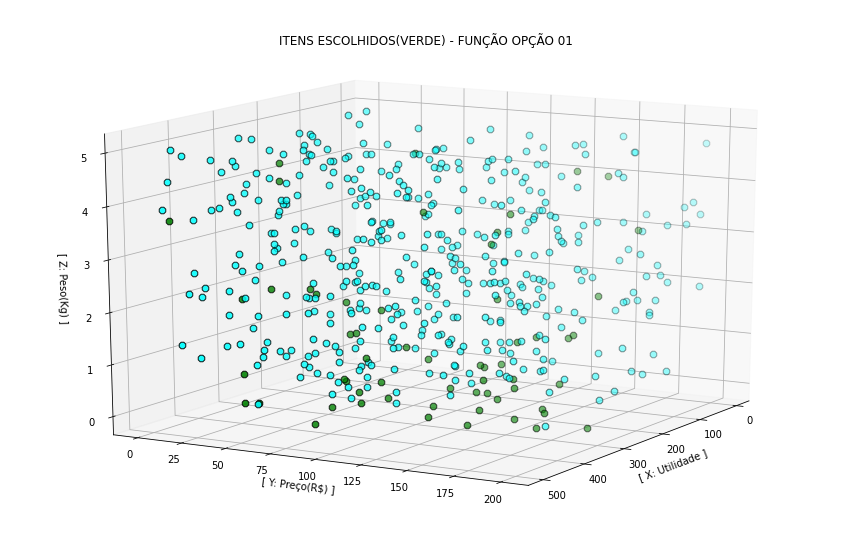

In [ ]:
plotPOPINI('ITENS ESCOLHIDOS(VERDE) - FUNÇÃO OPÇÃO 01',15,10)

In [ ]:
# ------------------------------------------------------------------------------------------
#TESTE - Gera a População Inicial passando como parâmetro a Opção 2 (iniciaPopulacao_B)
populacao_OP2 = iniciaPopulacao(tamanhoPOPULACAO, tamanhoCROMOSSOMO, 2)

#Printa o Resultado
printCABECALHO('TESTE INICIALIZAÇÃO: iniciaPopulacao - Opção 02','=')
x = 10  #Variável para definir somente uma parte da População Inicial para ser "printada"/mostrada.
print('populacao_OP2: População Inicial de tamanho', len(populacao_OP2),'(Cromossomos).','\n')
print('Segue os',x,'primeiros da População Inicial (via Opção 2):')
print(populacao_OP2[:x],'\n')
print('')

print('Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.')
soma=[]
soma= populacao_OP2[0].copy()
for i in range(1, len(populacao_OP2)):
    soma += populacao_OP2[i]
print(soma, '\n')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                           TESTE INICIALIZAÇÃO: iniciaPopulacao - Opção 02

populacao_OP2: População Inicial de tamanho 1000 (Cromossomos). 

Segue os 10 primeiros da População Inicial (via Opção 2):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 


Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.
[10  9 10  7  9  4  8  6  6 16  4  5 11  9  7 11 17  8  9  8  7 10  2  4
 14 12  8  9 13  3 11  3  8  9  7 11  4 10  6  6  7  8  7  6  8  8  8 13
  7  3 14  7  9  4 12  8 11 13  6  7  3  9  6  3  9  7 15 12  4  8 11  4
  5 14  9 12 20  9  8 10  8  6 11 13  9  3 13  5 12  4 11  8 11 18 10  7
 10  8 10  4 11 13  5  4 11 10  7 13 10  8 10  5 13 16  8  5  7  8 16 14
 13  9  5  5  9 17  6  9  6  9 11  3 13 14  6 12  7  6 10 12  9 11  7  9
  8  7 12 11  9  6 10  5  8 11  3 10  9  7 12  9  9  7  6 10  6 13  8 20
  6  7  9 11 11 13  4 11  9  7  8  4  8  5  7  4 13  5 12  9  4  5 11 11
  8  9 13  9

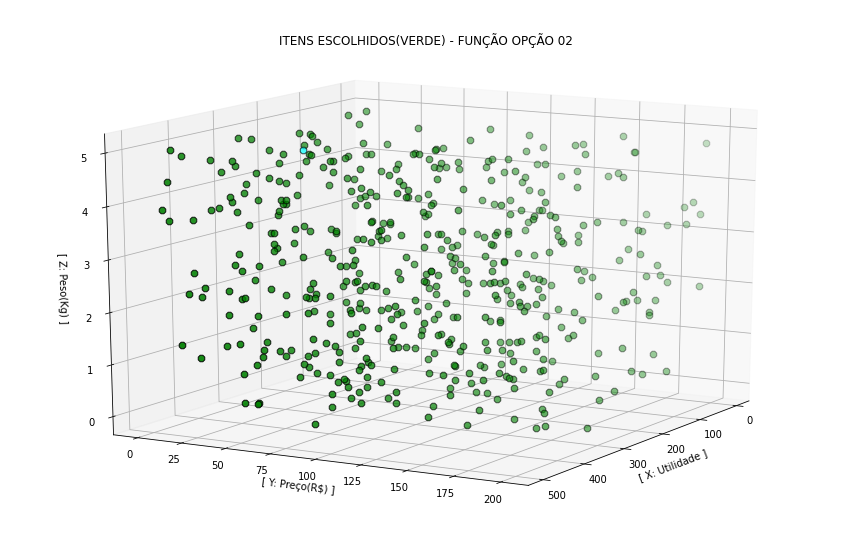

In [ ]:
plotPOPINI('ITENS ESCOLHIDOS(VERDE) - FUNÇÃO OPÇÃO 02',15,10)

**OBS.:** Nitidamente a População Inicial gerada pela Função de Opção02 é melhor distribuída que a Função de Opção01. Desta forma, utilizado a Função de Opção02, conseguimos aumentar as chances de mais indivíduos (tanto melhores, quanto piores) participarem da populaçao.

### **2) AVALIAÇÃO**

"*Use a Função Objetivo para maximizar o somatório da Utilidade de todos itens na mochila, dividido pelo somatório do Preço de todos itens na mochila.*"


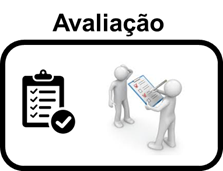

#### 2.1) Código:

In [ ]:
# ==========================================================================================
#                                         AVALIAÇÃO
# ==========================================================================================

In [ ]:
# ==========================================================================================
# FITNESS|*FUNCAO OBJETIVO*

# fitness(cromo): Recebe um Cromossomo e pecorre Gene por Gene,
# se o Gene for '1' ele verifica na BASE (de acordo com sua posição)
# os valores da 'Utilidade' e do 'Preco', e calcula a Função Objetivo(Fitness)
# daquele item e soma ao valor acumulado 'fit'.
def fitness(cromo):
    fit=0
    for pos in range(len(cromo)):
        if cromo[pos]:                                # [ 0  ,    1     ,   2  ]
           fit += listITENS[pos][1]/listITENS[pos][2] # [PESO, UTILIDADE, PRECO]
    return fit

# avaliacao(populcao): Recebe a População e pecorre Cromossomo por Cromossomo,
# e calcula o Fitness de cada Cromossomo. No pecorrer vai gerando uma Lista('listFIT')
# onde cada item da lista é formado pelo [fitness, cromosso].
# Ao final da função, esta retorna a Lista('listFIT').
def avaliacao(populcao):
    listFIT = []
    for cromo in populcao:
        aux = [fitness(cromo), list(cromo)]
        listFIT.append(aux)
    listFIT.sort(reverse=True)  # Ordena a POPULAÇÃO de acordo com FITNESS(do maior para o menor - decrescente)
    return listFIT

def avaliacaoPESO(populcao): # Função de Avaliação onde indivíduos acima de 12kg são penalizados em seu Fitness. 
    listFIT = []
    for cromo in populcao:
        auxPESO = readPESOCROMO(cromo)
        if (auxPESO > 12): aux = [fitness(cromo)/((auxPESO-12)*1000000000), list(cromo)]
        else: aux = [fitness(cromo), list(cromo)]
        listFIT.append(aux)
    listFIT.sort(reverse=True)  # Ordena a POPULAÇÃO de acordo com FITNESS(do maior para o menor - decrescente)
    return listFIT
# ==========================================================================================

#### 2.2) Testes:

In [ ]:
# ------------------------------------------------------------------------------------------
avaliaPOP_OP1 = avaliacao(populacao_OP1) # Avaliação realizada na População Inicial através da função Opção 1
avaliaPOP_OP2 = avaliacao(populacao_OP2) # Avaliação realizada na População Inicial através da função Opção 2
# ------------------------------------------------------------------------------------------

In [ ]:
# ------------------------------------------------------------------------------------------
printCABECALHO('AVALIAÇÃO','=')

for i in range(len(avaliaPOP_OP2)):
    print('Item %4i' %i,
          ': FIT = %6.2f' %avaliaPOP_OP2[i][0],
          '- Cromossomo:',avaliaPOP_OP2[i][1])
    
print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                                              AVALIAÇÃO

Item    0 : FIT = 548.07 - Cromossomo: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### **3) SELEÇÃO**

"*Deve ser implementado no algoritmo pelo menos: 2 métodos de Seleção;...* "

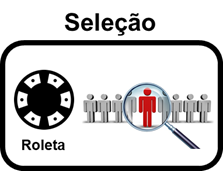

#### 3.1) Código:

In [ ]:
# ==========================================================================================
#                                       SELEÇÃO
# ==========================================================================================

##### Método de Seleção AMOSTRAGEM ESTOCÁSTICA UNIFORME (AEU)

In [ ]:
# ==========================================================================================
# Método de Seleção AMOSTRAGEM ESTOCÁSTICA UNIFORME (AEU)
# FUNCAO COMENTADA E COM OUTPUT DE INFORMAÇÕES
def selAEU(populacao):
    sum = 0
    for x in populacao: # Faz a Soma total do Fitness (total da  Avaliação) da População
        sum+=x[0]
    print('> Soma total do Fitness da População: %.2f' %sum)

    # Divide o espaço total do Fitness da População e tamanhos fixos (k).
    k = 0
    while (k==0):
          # k = np.random.randint(int(sum/2)) #K <= (sum/2) para garantir pelo menos 2 seleções
          k = np.random.randint(int(sum*0.1), #K <= (sum*0.1) para garantir uma quantidade razoável de k, 
                                int(sum/4))   #para que não fique muito grande a amostragem.

    # repet: Quantos vezes o intervalo k consegue repetir dentro do espaço total do Fitness da População
    repet = int(sum/k)
    pos = round((sum%k)/2,4) # Posição (balanceada) de onde o k se inicia.
    print('> k =',k, ' - Posição_Inicial:', pos, '- repete mais', repet, 'vezes o k.')

    # Lista contendo todas as posições(valor da avaliação) de k (k em k).
    listPosicoes=[]
    for _ in range(repet):
        listPosicoes.append(pos)
        pos += k
    listPosicoes.append(pos)
    print('> Posições Selecionadas:')
    print(np.array(listPosicoes))
    print('')

    # Pecorre a População em busca de qual individuo está
    # dentro do 'range' dos valores de Avalição da Lista dos valores de K.
    i=0
    avaliacaoK=0
    selecoes=[]
    reversePOP = populacao[::-1] # Ordena a População em ordem Crescente da Avaliação.
    sumAvaliacao = reversePOP[0][0]
    while avaliacaoK < len(listPosicoes): # De K em K (até não ter mais K), ele busca em qual Individuo o K percente.
          if (listPosicoes[avaliacaoK] > sumAvaliacao):
             sumAvaliacao += reversePOP[i+1][0]
             i += 1
          else:
             selecoes.append(reversePOP[i])
             avaliacaoK += 1

    print('> Gerou', repet+1, 'seleções.')
    # print('> Indivíduos Selecionados:', selecoes)
    
    selecoes = selecoes[::-1] # Inverte os selecionados para ficarem na ordem decrescente.
    # Separa em 2 SELEÇÕES, uma contendo os melhores Fitness e outro o contendo os Piores. 
    sel01 = selecoes[0:int(repet/2)+1]
    sel02 = selecoes[int(repet/2)+1:repet+1]

    return sel01, sel02
# ==========================================================================================
# ==========================================================================================
# FUNCAO SEM OUTPUT
def selAEU_(populacao):
    sum = 0
    for x in populacao: sum+=x[0]
    
    k = 0
    while (k==0): k = np.random.randint(int(sum*0.1), int(sum/4))
    
    repet = int(sum/k)
    pos = round((sum%k)/2,4)
    listPosicoes=[]
    for _ in range(repet):
        listPosicoes.append(pos)
        pos += k
    listPosicoes.append(pos)

    i=0
    avaliacaoK=0
    selecoes=[]
    reversePOP = populacao[::-1]
    sumAvaliacao = reversePOP[0][0]
    while avaliacaoK < len(listPosicoes):
          if (listPosicoes[avaliacaoK] > sumAvaliacao):
             sumAvaliacao += reversePOP[i+1][0]
             i += 1
          else:
             selecoes.append(reversePOP[i])
             avaliacaoK += 1

    selecoes = selecoes[::-1]
    sel01 = selecoes[0:int(repet/2)+1]
    sel02 = selecoes[int(repet/2)+1:repet+1]

    return sel01, sel02
# ==========================================================================================

##### Método de Seleção por RANKING

In [ ]:
# ==========================================================================================
#Método de Seleção por RANKING

# Função Ranking
def ranking(ordem):           #'ordem' é a posição do indivíduo dentro da população
    min = 0.9                 #'min' é o valor atribuído ao pior individuo da população
    max = 1.1                 #'max' é o valor atribuído ao melhor indivíduo da população
    numero = tamanhoPOPULACAO #'numero' é a quantidade de elementos da população
    rank = min + (max-min)*((ordem-1)/(numero-1))
    return rank

# FUNCAO COMENTADA E COM OUTPUT DE INFORMAÇÕES
def selRANKING(populacao):
    reversePOP = populacao[::-1] # Deve-se ordernar a População pelo valor da Avalação em ordem CRESCENTE.
    
    # Pecorre toda a População e atribui o Raking de cada indivíduo.
    # Cada indivíduo da população irá conter [Ranking,Cromossomo,Avaliação,Ordem]
    newPOP=[]
    for i in range(tamanhoPOPULACAO):
        newIND=[]
        newIND.append(ranking(i+1))     # Coloca o 'Ranking' na posição 0 do newIND
        newIND.append(reversePOP[i][1]) # O 'Cromossomo' se mantém na posição 1 do newIND
        newIND.append(reversePOP[i][0]) # Coloca a 'Avaliação' na posição 2 do newIND
        newIND.append(i+1)              # Coloca a 'Orden' na posição 3 do newIND
        newPOP.append(newIND)

    # Após gerar uma População 'RAKEADA', tal população é submetida
    # à um Método de Seleção. Neste caso, escolhemos o método ROLETA (Opção 3)
    # para realização a Seleção (2 Seleções) na População com Ranking.
    auxSEL01, auxSEL02 = selecao(newPOP[::-1], 3)

    sel01 = auxSEL01[::-1][1:3]
    sel02 = auxSEL02[::-1][1:3]

    return sel01, sel02
# ==========================================================================================

##### Método de Seleção ROLETA

In [ ]:
# ==========================================================================================
# Método de Seleção ROLETA
# FUNCAO COMENTADA E COM OUTPUT DE INFORMAÇÕES
def selROLETA(populacao):
    sum = 0
    for x in populacao: # Faz a Soma total do Fitness (total da  Avaliação) da População
        sum+=x[0]
    print('> Soma total do Fitness da População: %.2f' %sum)

    percent=0
    acumulado=0
    # listPercent=[]
    listAcumulado=[]

    # Pecorre toda a População e Calcula qual o % que a avaliação de cada cromossomo
    # possio de acordo com a "SomaTotaldoFitness"(sum).
    # Ao mesmo tempo que se pecorre a População e se Calcula o % de cada Cromossomo,
    # uma Lista com o Valor do % Acumulado é gerado, onde cada posição da lista contém
    # o 'range' (de...até) de cada cromossomo.
    for i in populacao:  
        # percent = round((i[0]/sum),8)
        # listPercent.append(percent)
        acumulado+= (i[0]/sum)
        listAcumulado.append(round(acumulado,8))
    # print('listPercent',listPercent)
    print('> Lista de % Acumulado:')
    print(np.array(listAcumulado))

    # Gera dois números aletórios entre 0..1 (0%..100%)
    # São gerados dois números pois este método retornará
    # 2 (duas) Seleções.
    randon = np.random.rand(2) 
    randon = np.sort(randon) # Ordena o randon para termos uma Seleção ordenada
    print('> Sorteio Aleatório (Roleta):', randon)

    roleta01,roleta02=0,0
    for i in range(len(listAcumulado)):
        if (listAcumulado[i] <= round(randon[0],4)): roleta01 = i
        if (listAcumulado[i] <= round(randon[1],4)): roleta02 = i

    print('> O Valor %0.4f'%randon[0],
          'sorteado está entre o valor %0.4f ...' %listAcumulado[roleta01],
          '%0.4f' %listAcumulado[roleta01+1],
          '(Posição: ',roleta01,')')
    print('> O Valor %0.4f'%randon[1],
          'sorteado está entre o valor %0.4f ...' %listAcumulado[roleta02],
          '%0.4f' %listAcumulado[roleta02+1],
          '(Posição: ',roleta02,')')
    # print('Posição',roleta01,' valor:',listAcumulado[roleta01])
    # print('Posição',roleta02,' valor:',listAcumulado[roleta02])

    # print(populacao[roleta01][1])
    # print(populacao[roleta02][1])
    sel01 = populacao[roleta01]
    sel02 = populacao[roleta02]

    return sel01, sel02
# ==========================================================================================
# FUNCAO SEM OUTPUT E SEM INFORMAÇÕES
def selROLETA_(populacao):
    sum = 0
    for x in populacao: sum+=x[0]
 
    acumulado=0
    listAcumulado=[]

    for i in populacao:  
        acumulado+= (i[0]/sum)
        listAcumulado.append(round(acumulado,8))
  
    randon = np.random.rand(2) 
    randon = np.sort(randon)
    
    roleta01,roleta02=0,0
    for i in range(len(listAcumulado)):
        if (listAcumulado[i] <= round(randon[0],4)): roleta01 = i
        if (listAcumulado[i] <= round(randon[1],4)): roleta02 = i

    sel01 = populacao[roleta01]
    sel02 = populacao[roleta02]

    return sel01, sel02
# ==========================================================================================

##### Método de Seleção por TORNEIO

In [ ]:
# ==========================================================================================
# Método de Seleção por TORNEIO
# Seleciona x indivíduos|cromossomos aleatóriamente e faz um 'Torneio' de quem tem a maior
# Avaliação(Fitness) entre eles e o seleciona.

# FUNCAO COMENTADA E COM OUTPUT DE INFORMAÇÕES
def selTORNEIO(populacao):
    tamanho = 3 #Torneio de tamanho (não maior que) 3 para não perder muito a diversidade da população
    randon = np.random.randint(tamanhoPOPULACAO, size=(2,tamanho)) # Gera 2 seleções aleatórias, onde cada seleção possui
                                                                   # X('tamanho') individuos aleatórios para participar do torneio.
    # print(randon)
    # print(np.max(randon[0]))
    # print(np.max(randon[1]))

    # Como a População encontra-se ordenada de forma decrescente, o 'ganhador' do Torneio
    # será o individuo de menor posição
    torneio01 = np.min(randon[0])
    torneio02 = np.min(randon[1])

    print('> SELEÇÃO 01: Torneio entre os indivíduos|cromossomos ',randon[0])
    print('              Ganhador do Torneio:',torneio01,'- Avaliação|Fitness =',populacao[torneio01][0])
    print('> SELEÇÃO 02: Torneio entre os indivíduos|cromossomos ',randon[1])
    print('              Ganhador do Torneio:',torneio02,'- Avaliação|Fitness =',populacao[torneio02][0])

    sel01 = populacao[torneio01]
    sel02 = populacao[torneio02]

    return sel01, sel02
# ==========================================================================================
# FUNCAO SEM OUTPUT E SEM INFORMAÇÕES
def selTORNEIO_(populacao):
    tamanho = 3
    randon = np.random.randint(tamanhoPOPULACAO, size=(2,tamanho))
    
    torneio01 = np.min(randon[0])
    torneio02 = np.min(randon[1])
    
    sel01 = populacao[torneio01]
    sel02 = populacao[torneio02]

    return sel01, sel02
# ==========================================================================================

##### main(  )

In [ ]:
# ==========================================================================================
# __MAIN__ Seleção #
def selecao(populacao, op):
    # sel_01, sel_02 = 0,0
    if   op == 1: sel_01, sel_02 = selAEU_(populacao)
    elif op == 2: sel_01, sel_02 = selRANKING(populacao)
    elif op == 3: sel_01, sel_02 = selROLETA_(populacao)
    elif op == 4: sel_01, sel_02 = selTORNEIO_(populacao)
    return sel_01, sel_02
# ==========================================================================================

#### 3.2) Testes:

"*1. Executar o algoritmo 5 vezes para os dois operadores de seleção, qual obtiver o melhor resultado, irá ser usado na próxima fase;*"

##### TESTE: SELEÇÃO - AMOSTRAGEM ESTOCÁSTICA UNIFORME (AEU)

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: SELEÇÃO - AMOSTRAGEM ESTOCÁSTICA UNIFORME (AEU)
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('SELEÇÃO - AMOSTRAGEM ESTOCÁSTICA UNIFORME (AEU)','=')
for rod in range(5):
    p01Aux, p02Aux = [],[]
    print('[ RODADA',rod+1,']')
    print('-'*tamMargem)
    p01Aux, p02Aux = selAEU(avaliaPOP_OP2)
    print('')
    if (rod == 0):
       parent01_AEU, parent02_AEU = p01Aux, p02Aux
    if (p01Aux[0][0] > parent01_AEU[0][0]):
       parent01_AEU, parent02_AEU = p01Aux, p02Aux
       auxRod = rod+1

printCABECALHO('MELHOR SELEÇÃO - AMOSTRAGEM ESTOCÁSTICA UNIFORME (AEU)','-')
print('Rodada',auxRod,'foi a melhor.')
print('_'*tamMargem)
print('')
print('SELEÇÃO_01:')
print('_'*tamMargem)
for _ in parent01_AEU:
    print('Fitness: %.2f' %_[0])
    print('Cromossomo:')
    print(np.array(_[1]))
    printCROMOSSOMO(_[1])
    print('')
# printCROMOSSOMO(parent01_AEU[0][1])

print('_'*tamMargem)
print('')
print('SELEÇÃO_02:')
print('_'*tamMargem)
for _ in parent02_AEU:
    print('Fitness: %.2f' %_[0])
    print('Cromossomo:')
    print(np.array(_[1]))
    printCROMOSSOMO(_[1])
    print('')
# printCROMOSSOMO(parent02_AEU[0][1])
print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                           SELEÇÃO - AMOSTRAGEM ESTOCÁSTICA UNIFORME (AEU)

[ RODADA 1 ]
----------------------------------------------------------------------------------------------------
> Soma total do Fitness da População: 44360.11
> k = 7857  - Posição_Inicial: 2537.553 - repete mais 5 vezes o k.
> Posições Selecionadas:
[ 2537.553 10394.553 18251.553 26108.553 33965.553 41822.553]

> Gerou 6 seleções.

[ RODADA 2 ]
----------------------------------------------------------------------------------------------------
> Soma total do Fitness da População: 44360.11
> k = 9694  - Posição_Inicial: 2792.053 - repete mais 4 vezes o k.
> Posições Selecionadas:
[ 2792.053 12486.053 22180.053 31874.053 41568.053]

> Gerou 5 seleções.

[ RODADA 3 ]
----------------------------------------------------------------------------------------------------
> Soma total do Fitness da População: 44360.11
> k = 5566  - Posição_Inicial: 2699.053 - repete mais 7 vezes o k.
> Posições Selecionadas:
[ 2699.

##### TESTE: SELEÇÃO - RANKING

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: SELEÇÃO - RANKING
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('SELEÇÃO - RANKING','=')
for rod in range(5):
    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    p01Aux, p02Aux = selRANKING(avaliaPOP_OP2)
    print('')
    print('SELEÇÃO_01:','\n','Fitness:', p01Aux[0],'\n','Cromossomo:','\n',np.array(p01Aux[1]),'\n')
    print('SELEÇÃO_02:','\n','Fitness:', p02Aux[0],'\n','Cromossomo:','\n',np.array(p02Aux[1]),'\n')
    print('')
    print('')
    if (rod == 0):
       parent01_RANK, parent02_RANK = p01Aux, p02Aux
    if (p01Aux[0] > parent01_RANK[0]):
       parent01_RANK, parent02_RANK = p01Aux, p02Aux
       auxRod = rod+1

printCABECALHO('MELHOR SELEÇÃO - RANKING','-')
print('Rodada',auxRod,'foi a melhor.')
print('_'*tamMargem,'\n')
print('SELEÇÃO_01:')
print('_'*tamMargem)
print('Fitness: %.2f' %parent01_RANK[0])
print('Cromossomo:')
print(np.array(parent01_RANK[1]))
printCROMOSSOMO(parent01_RANK[1])
print('')

print('')

print('_'*tamMargem,'\n')
print('SELEÇÃO_02:')
print('_'*tamMargem)
print('Fitness: %.2f' %parent02_RANK[0])
print('Cromossomo:')
print(np.array(parent02_RANK[1]))
printCROMOSSOMO(parent02_RANK[1])
print('')

print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                                          SELEÇÃO - RANKING

[RODADA 1 ]
----------------------------------------------------------------------------------------------------

SELEÇÃO_01: 
 Fitness: 24.908960757670442 
 Cromossomo: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

##### TESTE: SELEÇÃO - ROLETA

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: SELEÇÃO - ROLETA
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('SELEÇÃO - ROLETA','=')
for rod in range(5):
    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    p01Aux, p02Aux = selROLETA(avaliaPOP_OP2)
    print('')
    print('SELEÇÃO_01:','\n','Fitness:', p01Aux[0],'\n','Cromossomo:','\n',np.array(p01Aux[1]),'\n')
    print('SELEÇÃO_02:','\n','Fitness:', p02Aux[0],'\n','Cromossomo:','\n',np.array(p02Aux[1]),'\n')
    print('')
    print('')
    if (rod == 0):
       parent01_ROL, parent02_ROL = p01Aux, p02Aux
    if (p01Aux[0] > parent01_ROL[0]):
       parent01_ROL, parent02_ROL = p01Aux, p02Aux
       auxRod = rod+1

printCABECALHO('MELHOR SELEÇÃO - ROLETA','-')
print('Rodada',auxRod,'foi a melhor.')
print('_'*tamMargem,'\n')
print('SELEÇÃO_01:')
print('_'*tamMargem)
print('Fitness: %.2f' %parent01_ROL[0])
print('Cromossomo:')
print(np.array(parent01_ROL[1]))
printCROMOSSOMO(parent01_ROL[1])
print('')

print('')

print('_'*tamMargem,'\n')
print('SELEÇÃO_02:')
print('_'*tamMargem)
print('Fitness: %.2f' %parent02_ROL[0])
print('Cromossomo:')
print(np.array(parent02_ROL[1]))
printCROMOSSOMO(parent02_ROL[1])
print('')

print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                                           SELEÇÃO - ROLETA

[RODADA 1 ]
----------------------------------------------------------------------------------------------------
> Soma total do Fitness da População: 44360.11
> Lista de % Acumulado:
[0.01235504 0.02358038 0.03450646 0.04488263 0.05479373 0.06465984
 0.07452533 0.08438544 0.09418221 0.10397595 0.1136499  0.1230711
 0.13245944 0.14160066 0.15063321 0.15966308 0.16868279 0.17769522
 0.18669637 0.19568241 0.20463107 0.21353321 0.22242165 0.23128166
 0.23981881 0.24834333 0.25685993 0.26535133 0.27376015 0.28215183
 0.29045787 0.29875629 0.3051369  0.31133873 0.31734315 0.32321508
 0.32901938 0.33436817 0.33962206 0.34470902 0.34965671 0.35454774
 0.35939373 0.36423713 0.36889398 0.37350312 0.37807956 0.38265285
 0.38716429 0.39159888 0.39599595 0.40038816 0.40477285 0.40904765
 0.4132764  0.41748522 0.42157867 0.42559844 0.4296063  0.43345977
 0.4371991  0.44091064 0.44461249 0.44826074 0.45189531 0.45549485
 0.45905361 0.46257

##### TESTE: SELEÇÃO - TORNEIO

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: SELEÇÃO - TORNEIO
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('SELEÇÃO - TORNEIO','=')
for rod in range(5):
    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    p01Aux, p02Aux = selTORNEIO(avaliaPOP_OP2)
    print('')
    print('SELEÇÃO_01:','\n','Fitness:', p01Aux[0],'\n','Cromossomo:','\n',np.array(p01Aux[1]),'\n')
    print('SELEÇÃO_02:','\n','Fitness:', p02Aux[0],'\n','Cromossomo:','\n',np.array(p02Aux[1]),'\n')
    print('')
    print('')
    if (rod == 0):
       parent01_TORN, parent02_TORN = p01Aux, p02Aux
    if (p01Aux[0] > parent01_TORN[0]):
       parent01_TORN, parent02_TORN = p01Aux, p02Aux
       auxRod = rod+1

printCABECALHO('MELHOR SELEÇÃO - TORNEIO','-')
print('Rodada',auxRod,'foi a melhor.')
print('_'*tamMargem,'\n')
print('SELEÇÃO_01:')
print('_'*tamMargem)
print('Fitness: %.2f' %parent01_TORN[0])
print('Cromossomo:')
print(np.array(parent01_TORN[1]))
printCROMOSSOMO(parent01_TORN[1])
print('')

print('')

print('_'*tamMargem,'\n')
print('SELEÇÃO_02:')
print('_'*tamMargem)
print('Fitness: %.2f' %parent02_TORN[0])
print('Cromossomo:')
print(np.array(parent02_TORN[1]))
printCROMOSSOMO(parent02_TORN[1])
print('')

print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                                          SELEÇÃO - TORNEIO

[RODADA 1 ]
----------------------------------------------------------------------------------------------------
> SELEÇÃO 01: Torneio entre os indivíduos|cromossomos  [532 987 488]
              Ganhador do Torneio: 488 - Avaliação|Fitness = 17.89247336345544
> SELEÇÃO 02: Torneio entre os indivíduos|cromossomos  [123 513 179]
              Ganhador do Torneio: 123 - Avaliação|Fitness = 80.02306284847128

SELEÇÃO_01: 
 Fitness: 17.89247336345544 
 Cromossomo: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0

### **4) CRUZAMENTO**

"*Deve ser implementado no algoritmo pelo menos: ... 2 métodos de Cruzamento...* "

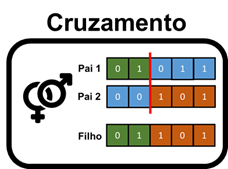

#### 4.1) Código:

In [ ]:
# ==========================================================================================
#                                   CROSSOVER | CRUZAMENTO
# ==========================================================================================

##### CrossOver 1 Ponto

In [ ]:
# ==========================================================================================
# CrossOver 1 Ponto
def crossover1PONTO(parents1, parents2):
    p1 = np.random.randint(0,tamanhoCROMOSSOMO) #ponto1
    # print("ponto1:",p1)
    # print()
    # print(parents1[:p1],'|',parents2[p1:])
    children1 = parents1[:p1]+parents2[p1:]
    # print(children1)
    # print()
    # print(parents2[:p1],'|',parents1[p1:])
    children2 = parents2[:p1]+parents1[p1:]
    # print(children2)
    # print()
    return children1, children2
# ==========================================================================================

##### CrossOver 2 Pontos

In [ ]:
# ==========================================================================================
# CrossOver 2 Pontos
def crossover2PONTOS(parents1, parents2):
    randon = np.random.randint(0,tamanhoCROMOSSOMO,2)
    randon = np.sort(randon)
    p1 = randon[0] #ponto1
    p2 = randon[1] #ponto2
    # print("ponto1:",p1)
    # print("ponto2:",p2)
    # print()
    # print(parents1)
    # print(parents2)
    # print()
    # print(parents1[:p1],'|',parents2[p1:p2],'|',parents1[p2:])
    children1 = parents1[:p1]+parents2[p1:p2]+parents1[p2:]
    # print(children1)
    # print()
    # print(parents2[:p1],'|',parents1[p1:p2],'|',parents2[p2:])
    children2 = parents2[:p1]+parents1[p1:p2]+parents2[p2:]
    # print(children2)
    # print()
    return children1, children2
# ==========================================================================================

##### CrossOver Uniforme

In [ ]:
# ==========================================================================================
# CrossOver Uniforme
def crossoverUNIFORME(parents1, parents2):
    # auxChoice=[]
    children1=[]
    children2=[]
    for i in range(tamanhoCROMOSSOMO):
        choice = np.random.randint(0,2)
        # print(i,':',choice)
        # auxChoice.append(choice)
        if choice:
           children1.append(parents1[i])
           children2.append(parents2[i])
        else:
           children1.append(parents2[i])
           children2.append(parents1[i])
    # print('choic',auxChoice)
    # print('pai01',parents1)
    # print('pai02',parents2)
    # print()
    # print('chd01',children1)
    # print('chd02',children2)
    return children1, children2
# ==========================================================================================

##### CrossOver Baseado em Maioria

In [ ]:
# ==========================================================================================
# CrossOver Baseado em Maioria
def crossoverMAIORIA(listPARENTS):
    children1, children2 = [],[]
    for i in range(tamanhoCROMOSSOMO):
        maioria = 0
        for j in range(len(listPARENTS)):
            maioria += listPARENTS[j][i]
        if maioria > round(len(listPARENTS)/2):
          children1.append(1)
          children2.append(0)
        else:
          children1.append(0)
          children2.append(1)
    # print('chd01',children1)
    # print('chd02',children2)
    return children1, children2
# ==========================================================================================

##### main(  )

In [ ]:
# ==========================================================================================
# __MAIN__ CrossOver #
def crossover(parents1, parents2, op):
    if   op == 1: children1, children2 = crossover1PONTO(parents1, parents2)
    elif op == 2: children1, children2 = crossover2PONTOS(parents1, parents2)
    elif op == 3: children1, children2 = crossoverUNIFORME(parents1, parents2)
    elif op == 4: children1, children2 = crossoverMAIORIA(parents1) #parents1:listPARENTS , parents2:Null
    return children1, children2
# ==========================================================================================

#### 4.2) Testes:

"*1. Executar o algoritmo 5 vezes para os dois operadores de seleção, qual obtiver o melhor resultado, irá ser usado na próxima fase;*"

##### TESTE: CrossOver 1 PONTO

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: CRUZAMENTO - CROSSOVER 1 PONTO
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('CRUZAMENTO - CROSSOVER 1 PONTO','=')

printCABECALHO('PAIS ESCOLHIDOS','.')
print('PARENT_01(CROMOSSOMO):')
print(parent01_RANK[1],'\n')
printCROMOSSOMO(parent01_RANK[1])
print('')
print('PARENTE_02(CROMOSSOMO):')
print(parent02_RANK[1],'\n')
printCROMOSSOMO(parent02_RANK[1])
print('.'*tamMargem,'\n')

for rod in range(5):
    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    p1,p2 = 100,100
    while (p1 > 12) or (p2 > 12):
          c01Aux, c02Aux = crossover1PONTO(parent01_RANK[1], parent02_RANK[1])
          p1 = readPESOCROMO(c01Aux)
          p2 = readPESOCROMO(c02Aux)
    print('')
    print('CROSSOVER_01(Filho01):')
    print('Cromossomo:',(c01Aux))
    printCROMOSSOMO(c01Aux)
    print('')
    print('CROSSOVER_01(Filho02):')
    print('Cromossomo:',(c02Aux))
    printCROMOSSOMO(c02Aux)
    print('')
    print('')
    if (rod == 0):
       children01_1P, children02_1P = c01Aux, c02Aux
    if (fitness(c01Aux) > fitness(children01_1P)):
       children01_1P, children02_1P = c01Aux, c02Aux
       auxRod = rod+1

printCABECALHO('MELHOR CRUZAMENTO - CROSSOVER 1 PONTO','-')
print('Rodada',auxRod,'foi a melhor.')
print('')
print('_'*tamMargem,'\n')
print('CROSSOVER_01(Filho01):')
print('_'*tamMargem)
print('Cromossomo:',children01_1P)
printCROMOSSOMO(children01_1P)
print('')

print('')

print('_'*tamMargem,'\n')
print('CROSSOVER_02(Filho02):')
print('_'*tamMargem)
print('Cromossomo:',children02_1P)
printCROMOSSOMO(children02_1P)
print('')

print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                                    CRUZAMENTO - CROSSOVER 1 PONTO

....................................................................................................
                                           PAIS ESCOLHIDOS
....................................................................................................

PARENT_01(CROMOSSOMO):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

##### TESTE: CrossOver 2 PONTOS

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: CRUZAMENTO - CROSSOVER 2 PONTOS
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('CRUZAMENTO - CROSSOVER 2 PONTOS','=')

printCABECALHO('PAIS ESCOLHIDOS','.')
print('PARENT_01(CROMOSSOMO):')
print(parent01_RANK[1],'\n')
printCROMOSSOMO(parent01_RANK[1])
print('')
print('PARENTE_02(CROMOSSOMO):')
print(parent02_RANK[1],'\n')
printCROMOSSOMO(parent02_RANK[1])
print('.'*tamMargem,'\n')

for rod in range(5):
    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    p1,p2 = 100,100
    while (p1 > 12) or (p2 > 12):
          c01Aux, c02Aux = crossover2PONTOS(parent01_RANK[1], parent02_RANK[1])
          p1 = readPESOCROMO(c01Aux)
          p2 = readPESOCROMO(c02Aux)   
    print('')
    print('CROSSOVER_01(Filho01):')
    print('Cromossomo:',(c01Aux))
    printCROMOSSOMO(c01Aux)
    print('')
    print('CROSSOVER_01(Filho02):')
    print('Cromossomo:',(c02Aux))
    printCROMOSSOMO(c02Aux)
    print('')
    print('')
    if (rod == 0):
       children01_2P, children02_2P = c01Aux, c02Aux
    if (fitness(c01Aux) > fitness(children01_2P)):
       children01_2P, children02_2P = c01Aux, c02Aux
       auxRod = rod+1

printCABECALHO('MELHOR CRUZAMENTO - CROSSOVER 2 PONTOS','-')
print('Rodada',auxRod,'foi a melhor.')
print('')
print('_'*tamMargem,'\n')
print('CROSSOVER_01(Filho01):')
print('_'*tamMargem)
print('Cromossomo:',children01_2P)
printCROMOSSOMO(children01_2P)
print('')

print('')

print('_'*tamMargem,'\n')
print('CROSSOVER_02(Filho02):')
print('_'*tamMargem)
print('Cromossomo:',children02_2P)
printCROMOSSOMO(children02_2P)
print('')

print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                                   CRUZAMENTO - CROSSOVER 2 PONTOS

....................................................................................................
                                           PAIS ESCOLHIDOS
....................................................................................................

PARENT_01(CROMOSSOMO):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

##### TESTE: CrossOver Uniforme

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: CRUZAMENTO - CROSSOVER UNIFORME
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('CRUZAMENTO - CROSSOVER UNIFORME','=')

printCABECALHO('PAIS ESCOLHIDOS','.')
print('PARENT_01(CROMOSSOMO):')
print(parent01_RANK[1],'\n')
printCROMOSSOMO(parent01_RANK[1])
print('')
print('PARENTE_02(CROMOSSOMO):')
print(parent02_RANK[1],'\n')
printCROMOSSOMO(parent02_RANK[1])
print('.'*tamMargem,'\n')

for rod in range(5):
    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    p1,p2 = 100,100
    while (p1 > 12) or (p2 > 12):
          c01Aux, c02Aux = crossoverUNIFORME(parent01_RANK[1], parent02_RANK[1])
          p1 = readPESOCROMO(c01Aux)
          p2 = readPESOCROMO(c02Aux)
    print('')
    print('CROSSOVER_01(Filho01):')
    print('Cromossomo:',(c01Aux))
    printCROMOSSOMO(c01Aux)
    print('')
    print('CROSSOVER_01(Filho02):')
    print('Cromossomo:',(c02Aux))
    printCROMOSSOMO(c02Aux)
    print('')
    print('')
    if (rod == 0):
       children01_UNI, children02_UNI = c01Aux, c02Aux
    if (fitness(c01Aux) > fitness(children01_UNI)):
       children01_UNI, children02_UNI = c01Aux, c02Aux
       auxRod = rod+1

printCABECALHO('MELHOR CRUZAMENTO - CROSSOVER UNIFORME','-')
print('Rodada',auxRod,'foi a melhor.')
print('')
print('_'*tamMargem,'\n')
print('CROSSOVER_01(Filho01):')
print('_'*tamMargem)
print('Cromossomo:',children01_UNI)
printCROMOSSOMO(children01_UNI)
print('')

print('')

print('_'*tamMargem,'\n')
print('CROSSOVER_02(Filho02):')
print('_'*tamMargem)
print('Cromossomo:',children02_UNI)
printCROMOSSOMO(children02_UNI)
print('')

print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                                   CRUZAMENTO - CROSSOVER UNIFORME

....................................................................................................
                                           PAIS ESCOLHIDOS
....................................................................................................

PARENT_01(CROMOSSOMO):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

##### TESTE: CrossOver Baseado em Maioria

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: CRUZAMENTO - CROSSOVER BASEADO EM MAIORIA
# ------------------------------------------------------------------------------------------
auxRod=1
printCABECALHO('CRUZAMENTO - CROSSOVER BASEADO EM MAIORIA','=')

for rod in range(5):
    print('[RODADA',rod+1,']')
    print('-'*tamMargem)

    listCROMO=[]
    for i in range(10):
        p01Aux, p02Aux = selRANKING(avaliaPOP_OP2)
        listCROMO.append(p01Aux[1])
        # print(p01Aux[1])

    printCABECALHO('PAIS ESCOLHIDOS','.')
    print('Foram escolhidos',len(listCROMO),'PAIS(Parents).')
    print('Segue DOIS aleatórios desta lista:')
    print('')

    print('> PARENT_01(CROMOSSOMO):')
    randon = np.random.randint(len(listCROMO))
    print('Individuo:',randon)
    print(listCROMO[randon],'\n')
    printCROMOSSOMO(listCROMO[randon])

    print('')

    print('> PARENTE_02(CROMOSSOMO):')
    randon = np.random.randint(len(listCROMO))
    print('Individuo:',randon)
    print(listCROMO[randon],'\n')
    printCROMOSSOMO(listCROMO[randon])

    print('.'*tamMargem,'\n')

    c01Aux, c02Aux = crossoverMAIORIA(listCROMO)
    print('')
    print('CROSSOVER_01(Filho01):')
    print('Cromossomo:',(c01Aux))
    printCROMOSSOMO(c01Aux)
    print('')
    print('CROSSOVER_01(Filho02):')
    print('Cromossomo:',(c02Aux))
    printCROMOSSOMO(c02Aux)
    print('')
    print('')

    if (rod == 0):
       children01_MAIOR, children02_MAIOR = c01Aux, c02Aux
    if (fitness(c01Aux) > fitness(children01_MAIOR)):
       children01_MAIOR, children02_MAIOR = c01Aux, c02Aux
       auxRod = rod+1

printCABECALHO('MELHOR CRUZAMENTO - CROSSOVER BASEADO EM MAIORIA','-')
print('Rodada',auxRod,'foi a melhor.')
print('')
print('_'*tamMargem,'\n')
print('CROSSOVER_01(Filho01):')
print('_'*tamMargem)
print('Cromossomo:',children01_MAIOR)
printCROMOSSOMO(children01_MAIOR)
print('')

print('')

print('_'*tamMargem,'\n')
print('CROSSOVER_02(Filho02):')
print('_'*tamMargem)
print('Cromossomo:',children02_MAIOR)
printCROMOSSOMO(children02_MAIOR)
print('')

print('')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                              CRUZAMENTO - CROSSOVER BASEADO EM MAIORIA

[RODADA 1 ]
----------------------------------------------------------------------------------------------------
....................................................................................................
                                           PAIS ESCOLHIDOS
....................................................................................................

Foram escolhidos 10 PAIS(Parents).
Segue DOIS aleatórios desta lista:

> PARENT_01(CROMOSSOMO):
Individuo: 8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Devido à forma de distribuição dos itens no cromosso, ou mesmo a quantidade de itens que conseguimos escolher dentro do cromossomo devido ao pesoMax, este tipo de cruzamento fica praticamente inviável. Pois praticamente não conseguimos um nível de repetição (pelo menos 50%) de genes dentre um lista de indivíduos selecionados.

### **5) MUTAÇÃO**

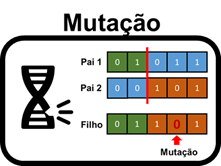

5.1) Código:

In [ ]:
# MUTAÇÃO #
def mutacao(x):
    prob_mutGene = np.random.uniform(0.005, 0.01) #probabilidade entre 0.5%-1.0% de mutação para cada GENE. 
    for i in range(tamanhoCROMOSSOMO):
        if (prob_mutGene >= np.random.uniform(0, 1)):
           if (x[i]==0): x[i]=1
           else: x[i]=0
    return x

5.2) Testes:

### **6) POPULAÇÃO**

"*Deve ser implementado no algoritmo pelo menos: ...e 2 Técnicas de População.* "

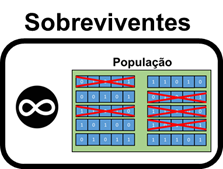

#### 6.1) Código:

In [ ]:
# ==========================================================================================
#                                        POPULAÇÃO
# ==========================================================================================

##### População - Técnica de Substituição da População Atual

In [ ]:
# População - Técnica de Substituição da População Atual

# O método mais simples é o de substituir a população atual pela nova população
# criada a partir dos operadores de Seleção, Cruzamento e Mutação
# Assim, os filhos criados são armazenados em um espaço auxiliar até que o número de filhos
# criados seja igual ao tamanho da nossa população, neste ponto os filhos são copiados por cima dos pais

def populacaoSUBST_(populacao): # Gera Indivíduos da população somente se Peso for <= 12kg. 
    newSUBPop = np.zeros((tamanhoPOPULACAO, tamanhoCROMOSSOMO), int)
    prob_mut = (np.random.randint(20,31))/100 #probabilidade de mutação entre 20%-30%

    for i in range(0,tamanhoPOPULACAO,2): # Será rodado (tamanhoPOPULACAO/2) vezes, pois cada Seleção e Cruzamento geram 2 Individuos|Cromossomos
        p01Aux, p02Aux = selecao(populacao,2) # SELEÇÃO: 1)AEU 2)RANK 3)ROLETA 4)TORNEIO

        aux1PESO,aux2PESO = 100,100
        while (aux1PESO > 12) or (aux2PESO > 12):
              c01Aux, c02Aux = crossover(p01Aux[1], p02Aux[1],3)  # CRUZAMENTO: 1)1PONTO 2)2PONTOS 3)UNIFORME 4)MAIORIA
              if (prob_mut >= np.random.uniform(0, 1)): c01Aux = mutacao(c01Aux)# MUTAÇÃO C1
              if (prob_mut >= np.random.uniform(0, 1)): c02Aux = mutacao(c02Aux)# MUTAÇÃO C1        
              aux1PESO = readPESOCROMO(c01Aux)
              aux2PESO = readPESOCROMO(c02Aux)

        newSUBPop[i] = c01Aux
        newSUBPop[i+1] = c02Aux
    return newSUBPop

In [ ]:
def populacaoSUBST(populacao):
    newSUBPop = np.zeros((tamanhoPOPULACAO, tamanhoCROMOSSOMO), int)
    prob_mut = (np.random.randint(20,31))/100     # probabilidade de mutação entre 20%-30%
    for i in range(0,tamanhoPOPULACAO,2):         # Será rodado (tamanhoPOPULACAO/2) vezes, pois cada Seleção e Cruzamento geram 2 Individuos|Cromossomos
        p01Aux, p02Aux = selecao(populacao, 2)    # SELEÇÃO: 1)AEU 2)RANK 3)ROLETA 4)TORNEIO
        c01Aux, c02Aux = crossover(p01Aux[1], p02Aux[1], 3)  #CRUZAMENTO: 1)1PONTO 2)2PONTOS 3)UNIFORME
        if (prob_mut >= np.random.uniform(0, 1)): c01Aux = mutacao(c01Aux)
        if (prob_mut >= np.random.uniform(0, 1)): c02Aux = mutacao(c02Aux)
        newSUBPop[i] = c01Aux
        newSUBPop[i+1] = c02Aux
    return newSUBPop

##### População - Técnica de Elitismo

In [ ]:
# População - Técnica de Elitismo

# A ideia é manter os k(primeiros) melhores indivíduos da população não devem morrer com sua geração, 
# mas sim passar para próxima geração, visando garantir seus genomas
def populacaoELIT_(populacao):
    avalPOP = avaliacao(populacao)
    auxNewPOP = populacaoSUBST(avalPOP) # Utiliza a Técnica de Substituição da População Atual para obter uma nova
                                        # população.
    auxPOP = np.append(populacao, auxNewPOP, axis=0)
    auxAvaliaPOP_ELIT = avaliacao(auxPOP)
    auxAvaliaPOP_ELIT = auxAvaliaPOP_ELIT[:tamanhoPOPULACAO]  # Pega os primeiros melhores da População
    return auxAvaliaPOP_ELIT

In [ ]:
def populacaoELIT(populacao, auxNewPOP): # Recebe a População Atual e uma Nova População e faz o elitismo.
    auxPOP = np.append(populacao, auxNewPOP, axis=0)
    auxAvaliaPOP_ELIT = avaliacaoPESO(auxPOP)
    auxAvaliaPOP_ELIT = auxAvaliaPOP_ELIT[:tamanhoPOPULACAO]  # Pega os primeiros melhores da População
    return auxAvaliaPOP_ELIT

##### População - Técnica Steady State

##### População - Estratégia µ + λ

#### 6.2) Testes:

"*1. Executar o algoritmo 5 vezes para os dois operadores de seleção, qual obtiver o melhor resultado, irá ser usado na próxima fase;*"

##### TESTE: População - Técnica de Substituição da População Atual

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: POPULAÇÃO - TÉCNICA DE SUBSTITUIÇÃO DA POPULAÇÃO ATUAL
printCABECALHO('POPULAÇÃO - TÉCNICA DE SUBSTITUIÇÃO DA POPULAÇÃO ATUAL','=')

for rod in range(5):
    auxPOPSUBST = populacaoSUBST(avaliaPOP_OP2)
    avalPOPSUBST = avaliacao(auxPOPSUBST)

    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    totAVAL=0
    aux=0
    for i in avalPOPSUBST:
        totAVAL+= i[0]

    print('')
    print('Nova População:')
    print(auxPOPSUBST,'\n')
    print('Total Avaliação da População:',totAVAL)
    print('')

    if (rod == 0):
       aux = totAVAL
       newPOPSUBST = auxPOPSUBST
    if (totAVAL > aux):
       aux = totAVAL
       newPOPSUBST = auxPOPSUBST

printCABECALHO('MELHOR POPULAÇÃO - TÉCNICA DE SUBSTITUIÇÃO DA POPULAÇÃO ATUAL','-')
x = 10  #Variável para definir somente uma parte da População Inicial para ser "printada"/mostrada.
print('newPOPSUBST: Nova População de tamanho', len(newPOPSUBST),'(Cromossomos).','\n')
print('Segue os',x,'primeiros da Nova População (via Técnica de Substituição da População Atual):')
print(newPOPSUBST[:x],'\n')
print('')

print('Distribuição da População: como/quantas vezes cada item(gene) foi escolhido.')
soma=[]
soma= newPOPSUBST[0].copy()
for i in range(1, len(newPOPSUBST)):
    soma += newPOPSUBST[i]
print(soma, '\n')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

                        POPULAÇÃO - TÉCNICA DE SUBSTITUIÇÃO DA POPULAÇÃO ATUAL

[RODADA 1 ]
----------------------------------------------------------------------------------------------------

Nova População:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Total Avaliação da População: 45192.83235402594

[RODADA 2 ]
----------------------------------------------------------------------------------------------------

Nova População:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Total Avaliação da População: 44906.168027845

[RODADA 3 ]
----------------------------------------------------------------------------------------------------

Nova População:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Total Avaliação da População: 45462.60133528025

[RODADA 4 ]
-------

##### TESTE: População - Técnica de Elitismo

In [ ]:
# ------------------------------------------------------------------------------------------
# TESTE: POPULAÇÃO - TÉCNICA DE ELITISMO
printCABECALHO('POPULAÇÃO - TÉCNICA DE ELITISMO','=')

for rod in range(5):
    auxPOPSUBST = populacaoELIT(populacao_OP2)

    print('[RODADA',rod+1,']')
    print('-'*tamMargem)
    totAVAL=0
    aux=0
    for i in auxPOPSUBST:
        totAVAL+= i[0]

    print('')
    print('Nova População (10 primeiros):')
    print(auxPOPSUBST[:10],'\n')
    print('Total Avaliação da População:',totAVAL)
    print('')
    print('')

    if (rod == 0):
       aux = totAVAL
       avaliaPOP_ELIT = auxPOPSUBST
    if (totAVAL > aux):
       aux = totAVAL
       avaliaPOP_ELIT = auxPOPSUBST

# ------------------------------------------------------------------------------------------

                                   POPULAÇÃO - TÉCNICA DE ELITISMO

[RODADA 1 ]
----------------------------------------------------------------------------------------------------

Nova População (10 primeiros):
[[548.0710759835357, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
printCABECALHO('MELHOR POPULAÇÃO - TÉCNICA DE ELITISMO','-')


print('Distribuição da População: como/quantas vezes cada item(gene) foi escolhido.')
soma=[]
soma= np.array(avaliaPOP_ELIT[0][1])
for i in range(1, len(newPOPSUBST)):
    soma += np.array(avaliaPOP_ELIT[i][1])
print(soma, '\n')

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
                                MELHOR POPULAÇÃO - TÉCNICA DE ELITISMO
----------------------------------------------------------------------------------------------------

Distribuição da População: como/quantas vezes cada item(gene) foi escolhido.
[ 7 20  7  5 13  2 11  1  5 22  3  7  9 11  9 16 12  6 18  6 13 13  1  5
 10 12 12  4 10  5 15  1  6  5  4 12  1  3  3  2  2  8 16  2 14  4  7 11
  5  3 29 10 10  3  9 10 12 13  8  9  4 10  4  4 17 14 12 17  0 14 10  4
  1 24 12 13 23  8 10  6  4  2 19  8 19  1 24  7 24 11 11  2 14 26  7 10
  4  9 18  3 13 15  6  0  8 11 12  9 12  8 11 10 10 13 11  9 15  7 15 12
 18  5 10  8 10 20 11 11  6 12 15  1 13 23  7  6  4  5  8 14  6 15  2  9
 10 14 10 17  5  8 13  6 12  6  2  7  8 11 11  8 16 16  3  8  2 10  9 22
  6  6 29 14 11 11  3  7  8 12 18  6 18  7  6  9 11  2 23 11  3 10 19 15
 12  9 14  6  4 14  4 13  5 18  2 11 18  5 16  2 17  8  7 11  6  

In [ ]:
# ------------------------------------------------------------------------------------------
printCABECALHO('MELHOR POPULAÇÃO - TÉCNICA DE ELITISMO','-')

for i in range(len(avaliaPOP_ELIT)):
    print('Iten',i,
          ': FIT = %6.2f' %avaliaPOP_ELIT[i][0],
          '- Cromossomo:',avaliaPOP_ELIT[i][1])

print('='*tamMargem)
# ------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
                                MELHOR POPULAÇÃO - TÉCNICA DE ELITISMO
----------------------------------------------------------------------------------------------------

Iten 0 : FIT = 582.07 - Cromossomo: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### TESTE: População - Técnica Steady State

##### TESTE: População - Estratégia µ + λ

## **EXECUÇÃO**

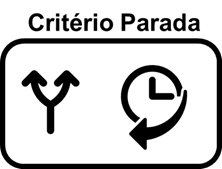

In [ ]:
# ------------------------------------------------------------------------------------------
geracoes = 40 # Método de Parada por Número de Gerações
tempoParada = 15*60 # Método de Parada por Tempo - em segundos
# ------------------------------------------------------------------------------------------

In [ ]:
# ------------------------------------------------------------------------------------------
#Gera a População Inicial passando como parâmetro a Opção 2
pop_ini = iniciaPopulacao(tamanhoPOPULACAO, tamanhoCROMOSSOMO, 2)
fit_pop_new = avaliacaoPESO(pop_ini)

In [ ]:
#Printa o Resultado
printCABECALHO('INICIALIZAÇÃO: iniciaPopulacao - Opção 02','=')
x = 10  #Variável para definir somente uma parte da População Inicial para ser "printada"/mostrada.
print('pop_ini: População Inicial de tamanho', len(pop_ini),'(Cromossomos).','\n')
print('Segue os',x,'primeiros da População Inicial (via Opção 2):')
print(pop_ini[:x],'\n')
print('')

print('Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.')
soma=[]
soma= pop_ini[0].copy()
for i in range(1, len(pop_ini)):
    soma += pop_ini[i]
print(soma, '\n')

print('Melhor indivíduo da população:')
printCROMOSSOMO(fit_pop_new[0][1])
print('')
print('='*tamMargem)

                              INICIALIZAÇÃO: iniciaPopulacao - Opção 02

pop_ini: População Inicial de tamanho 1000 (Cromossomos). 

Segue os 10 primeiros da População Inicial (via Opção 2):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 


Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.
[ 9  7 10  5  7 10  7  4  9  9 10  9  6  9  7  8  9 10  9  8 10  8  8  5
  7  7 12  6 12 10 13  9  9  6  8  7 15  8 11  6  8 10  3  8  8  3  7 10
  7 13 11  7  7  2 18 10 13 10  9 10  9  5  5  8  3  9  9  6 12 13 10 10
  9 11  8 14 13 13  3  3 12 11  5  6 11  6  6  9  5  8 11 11 12  9  7 10
  8 10  9  6  7  7 10  5  8 15 10 10  9  5  8  4 11  4  7  9  7  7 15  7
  4  5 13 11 12  7 13  7 12  7  8 10 10 12  4  6 11  8  5 10  6 11  2 10
  7  8 11 11  8 10  6  5  6 18  6  7 11 10 11  7 13  9  6 14 10  5  3  8
  3  7  9  2  9  5  8  9 13  9 12  8  4  3  7 14  9  8 11  8 10 15  6  9
 11 12  4  7  1  9  8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: UserWarning: The following kwargs were not used by contour: 'linewidth'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


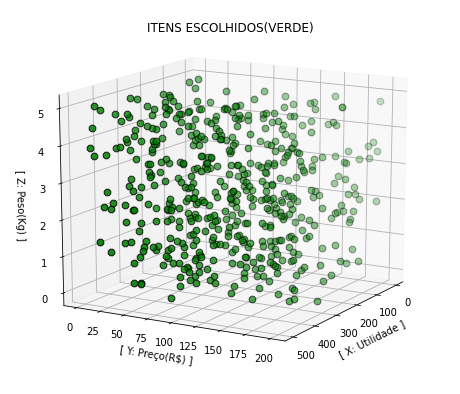

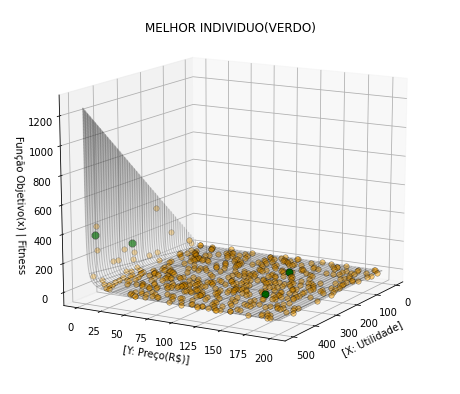

In [ ]:
plotPOPINI('ITENS ESCOLHIDOS(VERDE)',8,7)
plotPOPFIT(fit_pop_new[0][1],'MELHOR INDIVIDUO(VERDO)',8,7)

In [ ]:
new_pop_solucao = pop_ini.copy() # USADO NA TECNICA ELITISMO
listBESTCromo=[]

g,tempo = 0,0 # Auxiliares para contar as Gerações e o Tempo.
t0 = time()   # t0 recebe a time() inicial nomento de sua atribuição
while (geracoes > g) and (tempoParada > tempo):
    listBESTCromo.append(fit_pop_new[0])
    print(g+1,"ª GERAÇÃO (Repetição). MELHOR FITNESS: %.2f" %fit_pop_new[0][0])
    print('-'*tamMargem,'\n')

    # ----- GERA A POPULACAO PELA TECNICA DE SUBSTS -----#
    # new_pop_solucao = populacaoSUBST(fit_pop_new)
    # fit_pop_aux = avaliacao(new_pop_solucao)
    # fit_pop_aux = avaliacaoPESO(new_pop_solucao)

    # soma=[]
    # soma= new_pop_solucao[0].copy()
    # for i in range(1, len(new_pop_solucao)):
    #     soma += new_pop_solucao[i]
    # print(soma, '\n')
    # ---------------------------------------------------#
    # ----- GERA A POPULACAO PELA TECNICA ELITISMO ----- #
    aux_pop_sol = populacaoSUBST(fit_pop_new)
    fit_pop_aux = populacaoELIT(new_pop_solucao, aux_pop_sol)

    aux_pop_solucao = np.zeros((tamanhoPOPULACAO,tamanhoCROMOSSOMO), int)
    for i in range(tamanhoPOPULACAO):
        aux_pop_solucao[i] = np.array(fit_pop_aux[i][1])
        
    # soma=[]
    # soma= aux_pop_solucao[0].copy()
    # for i in range(1, len(aux_pop_solucao)):
    #     soma += aux_pop_solucao[i]
    # print(soma, '\n')
    # ---------------------------------------------------#


    # plotPOPINI('ITENS ESCOLHIDOS(VERDE)',8,8)
    # plotPOPFIT(fit_pop_new[0][1],'MELHOR INDIVIDUO | CROMOSSOMO(VERDE)',8,8)

    print('fit_pop_aux:',fit_pop_aux[0][0])
    printCROMOSSOMO(fit_pop_aux[0][1])
    print('')
    print('fit_pop_new:',fit_pop_new[0][0])
    printCROMOSSOMO(fit_pop_new[0][1])
    print('')

    if fit_pop_aux[0][0] > fit_pop_new[0][0]:
       fit_pop_new = fit_pop_aux
       new_pop_solucao = aux_pop_solucao # USADO NA TECNICA ELITISMO
 
    
    g+=1  # Contador de Gerações
    tempo = time()-t0 # tempo de execução é igual ao time(), do momento desta atribuição/execução,
                      # menos o t0 (tempo inicial do laço).
    print('Tempo de Execução desde a Rodada_01: %0.3fs' %tempo)
    print('')
    if (tempoParada <= tempo): # Condição que informa que o TEMPO PARA PARADA foi extrapolado.
        print('_'*tamMargem)
        print('')
        print('!!! PARADA POR TEMPO !!!')
        print('!!!  Tempo Excedido  !!!')
        print('_'*tamMargem)
        print('')


1 ª GERAÇÃO (Repetição). MELHOR FITNESS: 577.32
---------------------------------------------------------------------------------------------------- 

fit_pop_aux: 577.3218355601424
Itens Escolhido: [29, 253, 332, 343]
Fitness: 577.3218355601424
Peso: 10.66 Kg - Utilidade: 1219 - Preço: $ 145.61

fit_pop_new: 577.3218355601424
Itens Escolhido: [29, 253, 332, 343]
Fitness: 577.3218355601424
Peso: 10.66 Kg - Utilidade: 1219 - Preço: $ 145.61

Tempo de Execução desde a Rodada_01: 7.065s

2 ª GERAÇÃO (Repetição). MELHOR FITNESS: 577.32
---------------------------------------------------------------------------------------------------- 

fit_pop_aux: 794.95829081589
Itens Escolhido: [19, 332, 378]
Fitness: 794.95829081589
Peso: 9.26 Kg - Utilidade: 1391 - Preço: $ 126.97

fit_pop_new: 577.3218355601424
Itens Escolhido: [29, 253, 332, 343]
Fitness: 577.3218355601424
Peso: 10.66 Kg - Utilidade: 1219 - Preço: $ 145.61

Tempo de Execução desde a Rodada_01: 14.255s

3 ª GERAÇÃO (Repetição). MELH

In [ ]:
#Printa o Resultado
printCABECALHO('NovaPopulacao depois de X Gerações: new_pop_solucao - Opção 02','=')
x = 10  #Variável para definir somente uma parte da População Inicial para ser "printada"/mostrada.
print('new_pop_solucao: Nova População de tamanho', len(new_pop_solucao),'(Cromossomos).','\n')
print('Segue os',x,'primeiros da Nova População (via Opção 2):')
print(new_pop_solucao[:x],'\n')
print('')

print('Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.')
soma=[]
soma= new_pop_solucao[0].copy()
for i in range(1, len(new_pop_solucao)):
    soma += new_pop_solucao[i]
print(soma, '\n')

printCROMOSSOMO(new_pop_solucao[0])

print('='*tamMargem)

                    NovaPopulacao depois de X Gerações: new_pop_solucao - Opção 02

new_pop_solucao: Nova População de tamanho 1000 (Cromossomos). 

Segue os 10 primeiros da Nova População (via Opção 2):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 


Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.
[ 39  18   0   0   0   0   0   0   4   0   0   0   7   0   0   0   0   0
 737   0   0   2   0   4   0   0  35   0   8   3   1   1   5   0   0   0
   0   0   0   0   0   7   0   0  38   2   0   0   2   6   0   1   4   0
   0   0   4   1   0   0   1   2   0   7   0  93   6   0   0   3   2   0
   4   5   6   0   2  21   0   0   0   0   6   0  31   0   0   0  14   1
  12   0   4   6   0  40   1  10   2   7   0   0   0   0   0   5   0   0
  20   0   1   2   0   1   0  13  71   7   0   0   1   0   0   1   0   0
   2   2  22   0   2   0   0  26   4   0   0   0   0   3   0  21   0  20
   2   0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: UserWarning: The following kwargs were not used by contour: 'linewidth'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


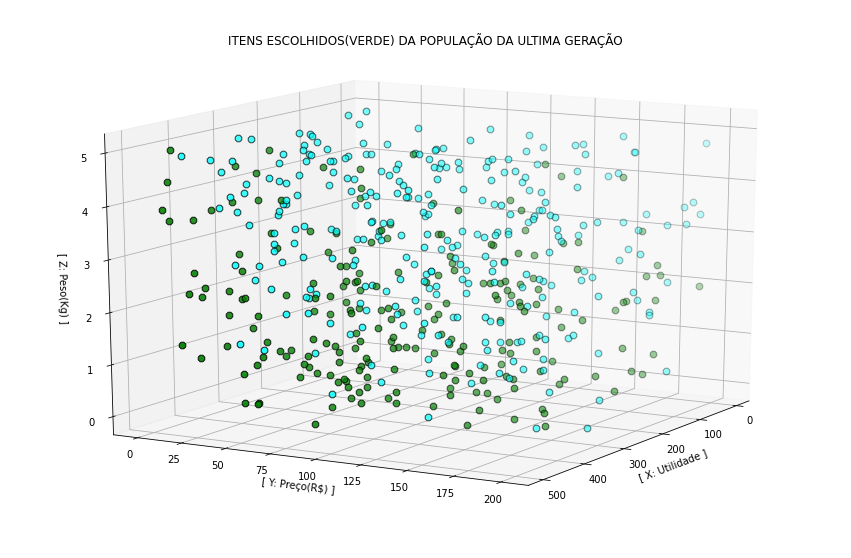

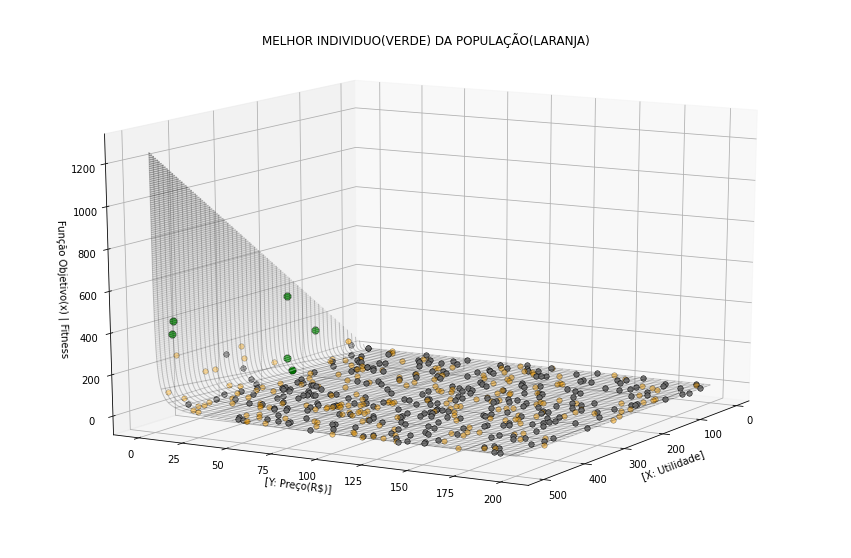

In [ ]:
plotPOPINI('ITENS ESCOLHIDOS(VERDE) DA POPULAÇÃO DA ULTIMA GERAÇÃO',15,10)
plotPOPFIT(fit_pop_new[0][1],'MELHOR INDIVIDUO(VERDE) DA POPULAÇÃO(LARANJA)',15,10)

In [ ]:
maxPESO = max(BASE['PESO'])       # Peso máximo encontrado na BASE 
maxUTIL = max(BASE['UTILIDADE'])  # Valor máximo de Utilidade de um item encontrado na BASE 
maxPREC = max(BASE['PRECO'])      # Preço máximo encontrado na BASE

print('='*40)
print(' '*14,'RANGE BASE')
print('='*40)
print('       Peso: 0 ..',maxPESO)
print('  Utilidade: 0 ..',maxUTIL)
print('      Preco: 0 ..',maxPREC)
print('='*40)
print()

               RANGE BASE
       Peso: 0 .. 4.992
  Utilidade: 0 .. 499
      Preco: 0 .. 199.92



/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


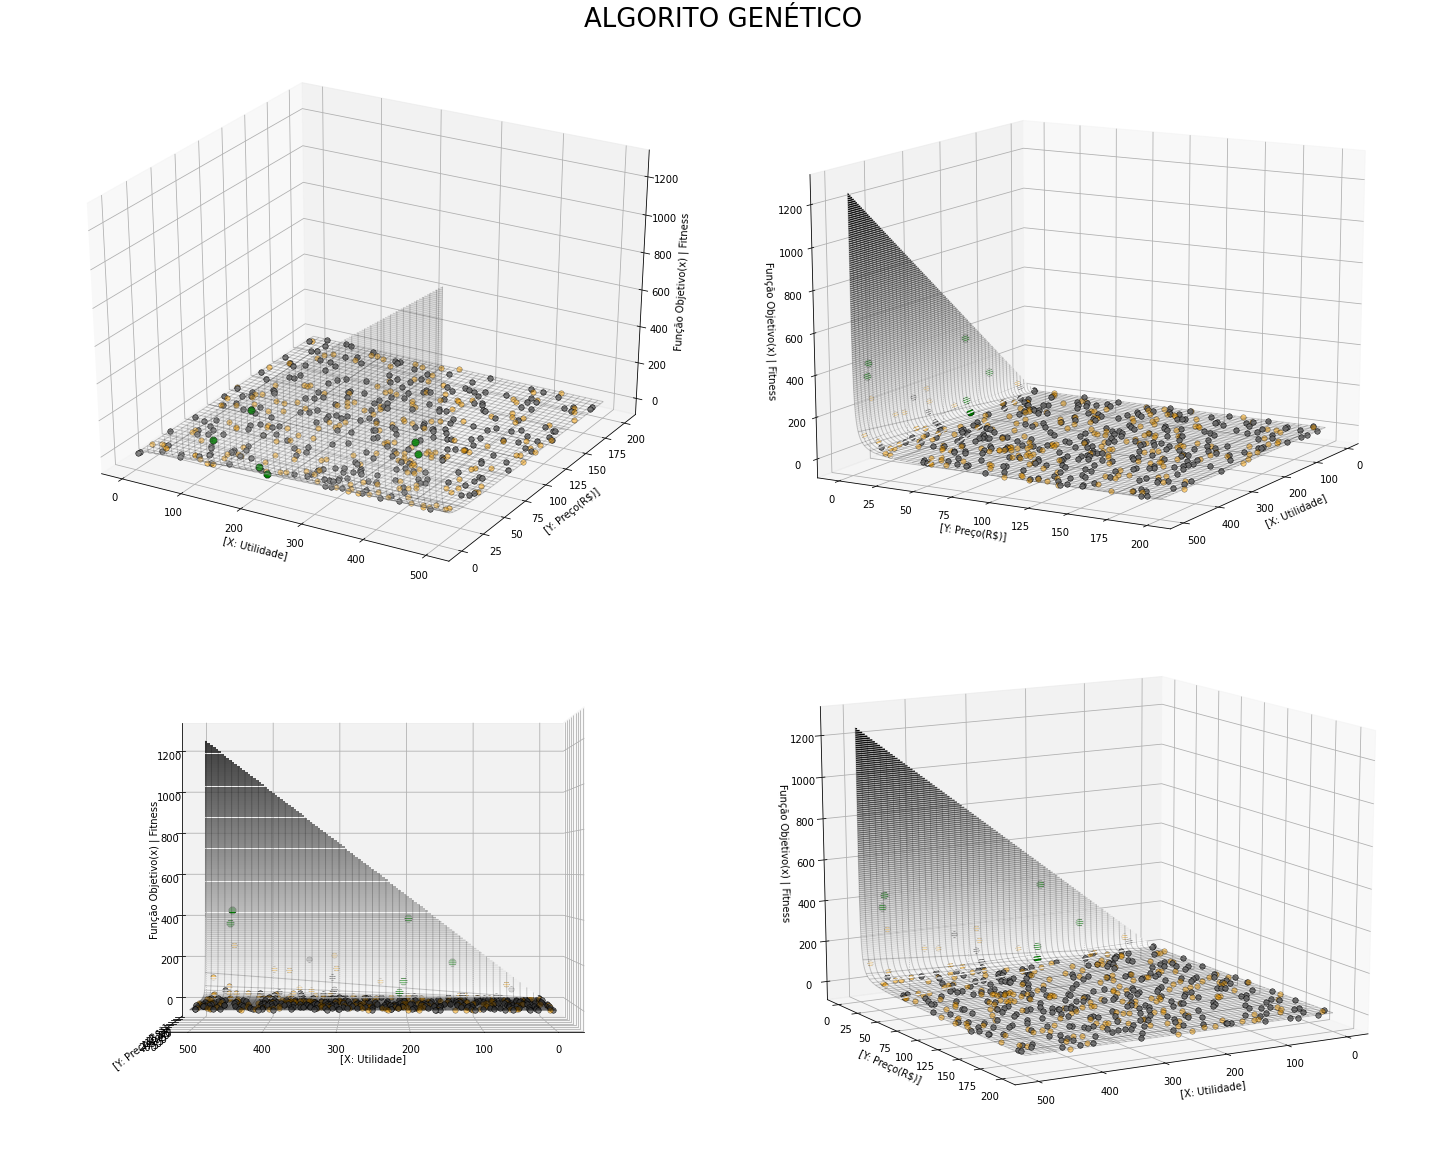

In [ ]:
#------------------------------------------------------------------------------#
cromoBEST = fit_pop_new[0][1]
fig, axs = plt.subplots(2, 2, figsize=(20,16), constrained_layout=True, subplot_kw={'projection': '3d'})
fig.suptitle('ALGORITO GENÉTICO', size=26) #Titulo do gráfico

# eixoX: Utilidade | eixoY: Preco
# eixoZ: Fitness
#========== Grafico [0,0] ==========
axs[0,0].plot_wireframe(X, Y, Z, cmap=cm.seismic, antialiased=True, alpha=0.2, linewidth=1, color='black')
axs[0,0].contour3D(X, Y, Z, 150, cmap=cm.binary, alpha=0.2, linewidth=1, antialiased=True)

for rod in range(len(BASE['ITEM'])):
        # graph = axs[0,0].scatter(
        #                   (BASE['UTILIDADE'][rod]),#X
        #                   (BASE['PRECO'][rod]),    #Y
        #                   (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
        #                   c='orange', marker="o", 
        #                   s=30, alpha=0.8, linewidth=0.5, edgecolors='k'
        #                   )
        if (soma[rod]==0): 
            color='gray'
            mk="o"
            alp=1.0
            Sx=30
        elif (cromoBEST[rod]==0): 
            color='orange'
            mk="o"
            alp=0.5
            Sx=30
        else:
            color='green'
            mk="8"
            alp=1.0
            Sx=60
        graph = axs[0,0].scatter(
                          (BASE['UTILIDADE'][rod]),#X
                          (BASE['PRECO'][rod]),    #Y
                          (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
                          c=color, marker=mk, 
                          s=Sx, alpha=alp, linewidth=0.5, edgecolors='k'
                          )
        
# axs[0,0].set_title('ALGORITO GENÉTICO') #Titulo do gráfico
axs[0,0].set_xlabel('[X: Utilidade]')
axs[0,0].set_ylabel('[Y: Preço(R$)]')
axs[0,0].set_zlabel('Função Objetivo(x) | Fitness')



#========== Grafico [0,1] ==========
axs[0,1].plot_wireframe(X, Y, Z, cmap=cm.seismic, antialiased=True, alpha=0.2, linewidth=1, color='black')
axs[0,1].contour3D(X, Y, Z, 150, cmap=cm.binary, alpha=1, linewidth=1, antialiased=True)

for rod in range(len(BASE['ITEM'])):
        # graph = axs[0,1].scatter(
        #                   (BASE['UTILIDADE'][rod]),#X
        #                   (BASE['PRECO'][rod]),    #Y
        #                   (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
        #                   c='orange', marker="o", 
        #                   s=30, alpha=0.8, linewidth=0.5, edgecolors='k'
        #                   )
        if (soma[rod]==0): 
            color='gray'
            mk="o"
            alp=1.0
            Sx=30
        elif (cromoBEST[rod]==0): 
            color='orange'
            mk="o"
            alp=0.5
            Sx=30
        else:
            color='green'
            mk="8"
            alp=1.0
            Sx=60
        graph = axs[0,1].scatter(
                          (BASE['UTILIDADE'][rod]),#X
                          (BASE['PRECO'][rod]),    #Y
                          (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
                          c=color, marker=mk, 
                          s=Sx, alpha=alp, linewidth=0.5, edgecolors='k'
                          )

# axs[0,1].set_title('ALGORITO GENÉTICO') #Titulo do gráfico
axs[0,1].set_xlabel('[X: Utilidade]')
axs[0,1].set_ylabel('[Y: Preço(R$)]')
axs[0,1].set_zlabel('Função Objetivo(x) | Fitness')

axs[0,1].view_init(15, 30)


#========== Grafico [1,0] ==========
axs[1,0].plot_wireframe(X, Y, Z, cmap=cm.seismic, antialiased=True, alpha=0.2, linewidth=1, color='black')
axs[1,0].contour3D(X, Y, Z, 150, cmap=cm.binary, alpha=1, linewidth=1, antialiased=True)

for rod in range(len(BASE['ITEM'])):
        # graph = axs[1,0].scatter(
        #                   (BASE['UTILIDADE'][rod]),#X
        #                   (BASE['PRECO'][rod]),    #Y
        #                   (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
        #                   c='orange', marker="o", 
        #                   s=30, alpha=0.8, linewidth=0.5, edgecolors='k'
        #                   )
        if (soma[rod]==0): 
            color='gray'
            mk="o"
            alp=1.0
            Sx=30
        elif (cromoBEST[rod]==0): 
            color='orange'
            mk="o"
            alp=0.5
            Sx=30
        else:
            color='green'
            mk="8"
            alp=1.0
            Sx=60
        graph = axs[1,0].scatter(
                          (BASE['UTILIDADE'][rod]),#X
                          (BASE['PRECO'][rod]),    #Y
                          (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
                          c=color, marker=mk, 
                          s=Sx, alpha=alp, linewidth=0.5, edgecolors='k'
                          )

# axs[1,0].set_title('ALGORITO GENÉTICO') #Titulo do gráfico
axs[1,0].set_xlabel('[X: Utilidade]')
axs[1,0].set_ylabel('[Y: Preço(R$)]')
axs[1,0].set_zlabel('Função Objetivo(x) | Fitness')

axs[1,0].view_init(0, 90)


#========== Grafico [1,1] ==========
axs[1,1].plot_wireframe(X, Y, Z, cmap=cm.seismic, antialiased=True, alpha=0.2, linewidth=1, color='black')
axs[1,1].contour3D(X, Y, Z, 150, cmap=cm.binary, alpha=1, linewidth=1, antialiased=True)

for rod in range(len(BASE['ITEM'])):
        # graph = axs[1,1].scatter(
        #                   (BASE['UTILIDADE'][rod]),#X
        #                   (BASE['PRECO'][rod]),    #Y
        #                   (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
        #                   c='orange', marker="o", 
        #                   s=30, alpha=0.8, linewidth=0.5, edgecolors='k'
        #                   )
        if (soma[rod]==0): 
            color='gray'
            mk="o"
            alp=1.0
            Sx=30
        elif (cromoBEST[rod]==0): 
            color='orange'
            mk="o"
            alp=0.5
            Sx=30
        else:
            color='green'
            mk="8"
            alp=1.0
            Sx=60
        graph = axs[1,1].scatter(
                          (BASE['UTILIDADE'][rod]),#X
                          (BASE['PRECO'][rod]),    #Y
                          (func(BASE['UTILIDADE'][rod],BASE['PRECO'][rod])), #Z
                          c=color, marker=mk, 
                          s=Sx, alpha=alp, linewidth=0.5, edgecolors='k'
                          )

# axs[1,1].set_title('ALGORITO GENÉTICO') #Titulo do gráfico
axs[1,1].set_xlabel('[X: Utilidade]')
axs[1,1].set_ylabel('[Y: Preço(R$)]')
axs[1,1].set_zlabel('Função Objetivo(x) | Fitness') 

axs[1,1].view_init(15, 60)

#====

fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, 
                                hspace=0, wspace=0)

clear_output()
plt.show()
#------------------------------------------------------------------------------#